# **Statistical evaluation**

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
%run "Functions/general_setup.py"
%reload_ext autoreload
warnings.filterwarnings("ignore")

## Parameters

#### Data files

In [ ]:
#Data files
Spreadsheet_id = '15h-UzWg70AFkvrFQUOd869_WuliyWBg4ry3UWWrvICA'
#Spreadsheet_id=r''
#File_id = '/home/zoomagri/Bakstyx/Python models and codes/Statistical analysis/Data/Test Validaciones. Corta. V1.0.xlsx'
File_id = ''
#Norm files
Norma_sheet='1ME6Dhr89g7hwI3BhiKjd2zjf0h9FI2IuKlL1AozMId0' #Inmutable don't change it!!
#Norma_sheet=''
#Norma_id='/home/zoomagri/Bakstyx/Python models and codes/Statistical analysis/Data/limites de normas.xlsx'
Norma_id = ''

#### Evaluation parameters

In [1]:
#Evaluation parameters
Modelo = 'spex_barley_v31.0.3'
Titulo = 'Test_1'
Carpeta = 'Test_validation'
Norma = 'NORMA DE SOJA: ARGENTINA XVII'
Commodity = Modelo.split('_')[-2]
Fecha = str(date.today())
alfa = 0.05
IC = 95

NameError: name 'date' is not defined

#### Evaluation folder

In [ ]:
#Evaluation Folder
fold = f'Results/{Commodity.capitalize()}/{Carpeta}/{Titulo}/{Modelo}-{Fecha}'
os.makedirs(fold, exist_ok=True)
fold

## Norms

In [3]:
resp, idx_norma = exf.idx_norma_test(Norma)

dict_norma_label = {categoria["name"]: [label["name"] 
                                        for label in categoria["typings"]] 
                    for categoria in resp[idx_norma]["items"]}

cat = list(dict_norma_label.keys())
cat_norma = eh.standard_name(cat)
cat_norma

['Sobre_zaranda',
 'Bajo_zaranda',
 'Materias_extrañas',
 'Dañados',
 'Picados',
 'Quebrados_y_pelados',
 'Curados']

## Norms Limits

In [4]:
df_norma = import_data(Spreadsheet_id=Norma_sheet, File_id=Norma_id, data_to_pull=Norma)
df_norma = eh.standard_dataframe(df_norma)
df_norma

COMPLETE: Data copied
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Categoria   7 non-null      object 
 1   Base        7 non-null      float64
 2   Tolerancia  7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 296.0+ bytes
None


Categoria  Base  Tolerancia
0        Sobre_zaranda  85.0        80.0
1         Bajo_zaranda   0.0         4.0
2    Materias_extrañas   0.5         1.0
3              Dañados   0.5         1.5
4              Picados   0.0         0.5
5  Quebrados_y_pelados   1.5         4.0
6              Curados   0.0         0.0

# Stat_val V2.0

### Dictionaries

In [5]:
formulas={
    'Repetibilidad':'C(Rep)',
    'Exactitud':'C(Metodologia)',
    'Representabilidad':'C(Metodologia)+C(Sample)',
    'Exactitud_c_rep':'C(Metodologia)+C(Sample)+C(Rep)+C(Metodologia):C(Sample)',
    'Comp_de_Metodologias': 'C(Metodologia)'
}

variables={
    'Repetibilidad':['Rep'],
    'Exactitud':['Metodologia'],
    'Representabilidad':['Metodologia'],
    'Exactitud_c_rep':['Metodologia'],
    'Comp_de_Metodologias':['Metodologia']
}

plot_pair={
    'Repetibilidad':'Rep',
    'Exactitud':'Sample',
    'Representabilidad':'Sample',
    'Exactitud_c_rep':'Sample',
    'Comp_de_Metodologias':'Sample'
}

eda_diff_sub_index={
    'Repetibilidad':'id',
    'Exactitud':'Sample',
    'Representabilidad':'Sample',
    'Exactitud_c_rep':'id',
    'Comp_de_Metodologias':'Sample'
}

eda_diff_bar_plot={
    'Repetibilidad':'Rep',
    'Exactitud':'Sample',
    'Representabilidad':'Sample',
    'Exactitud_c_rep':'Sample', #re-think this or something could go wrong
    'Comp_de_Metodologias':'Sample'
}
rv_norm = {
    'Repetibilidad':'ZoomAgri Spex',
    'Exactitud':'MR',
    'Representabilidad':'MR',
    'Exactitud_c_rep':'MR',
    'Comp_de_Metodologias':'ZoomAgri Spex'
}
merger={
    'Repetibilidad':'id',
    'Exactitud':'Sample',
    'Representabilidad':'Sample',
    'Exactitud_c_rep':'id',
    'Comp_de_Metodologias':'Sample'
}


### Listas

In [6]:
broken_plot = ['barley']
non_broken_plot = ['soy']

## Repetibilidad, Exactitud, Exactitud con repeticiones, Representabilidad, Comparacion de Metodologias

Use this part of code in case of analysis or validations pre-establish. The option for each analysis or graph are preset inside the dictionary script.  
In case of use a not preset analysis use the second part.

### Data

In [7]:
#Immport raw data
data_to_pull = 'Repetibilidad'
df = import_data(Spreadsheet_id, File_id, data_to_pull)
df = eh.standard_dataframe(df)
df

COMPLETE: Data copied
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Metodologia          10 non-null     object 
 1   id                   10 non-null     int64  
 2   Rep                  10 non-null     int64  
 3   Sobre zaranda        10 non-null     int64  
 4   Bajo zaranda         10 non-null     float64
 5   Materias extrañas    10 non-null     float64
 6   Dañados              10 non-null     float64
 7   Picados              10 non-null     float64
 8   Quebrados y pelados  10 non-null     float64
 9   Curados              10 non-null     int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 928.0+ bytes
None


Metodologia  id  Rep  Sobre_zaranda  Bajo_zaranda  Materias_extrañas  \
0  ZoomAgri Spex   1    1             89           9.4                3.0   
1  ZoomAgri Spex   2    1             84           5.6               11.9   
2  ZoomAgri Spex   3    2             76          13.8               15.7   
3  ZoomAgri Spex   4    2             73           6.7               21.0   
4  ZoomAgri Spex   5    3             78          12.4                6.7   
5       Metodo 2   1    1             82          12.6               17.9   
6       Metodo 2   2    1             72          15.0                3.9   
7       Metodo 2   3    2             80          19.2                5.1   
8       Metodo 2   4    2             89          10.0                6.9   
9       Metodo 2   5    3             77          16.3               23.0   

   Dañados  Picados  Quebrados_y_pelados  Curados  
0      4.6      7.3                  3.1        7  
1      0.9     12.8                 12.1        7  
2      9.7     13.6                 13.3       10  
3      2.3     14.6                  5.2       11  
4     21.8     13.9                 15.6        7  
5     12.1      3.1                  0.3        0  
6     24.8     18.0                 14.4       28  
7     12.4     19.0                 14.4        5  
8      8.8      0.0                  4.0        2  
9      5.2      6.1                 22.8       13

#### Data distribution

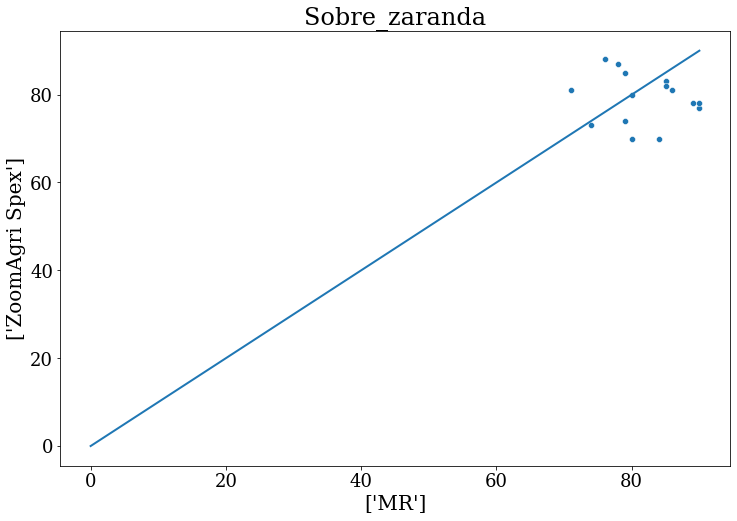

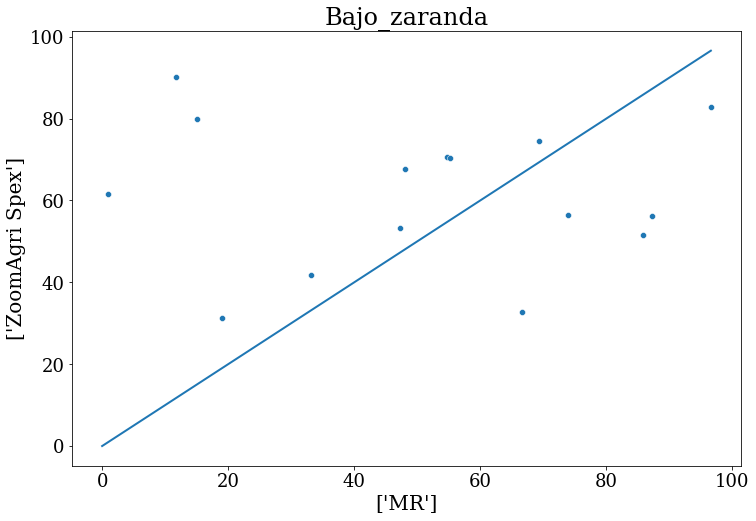

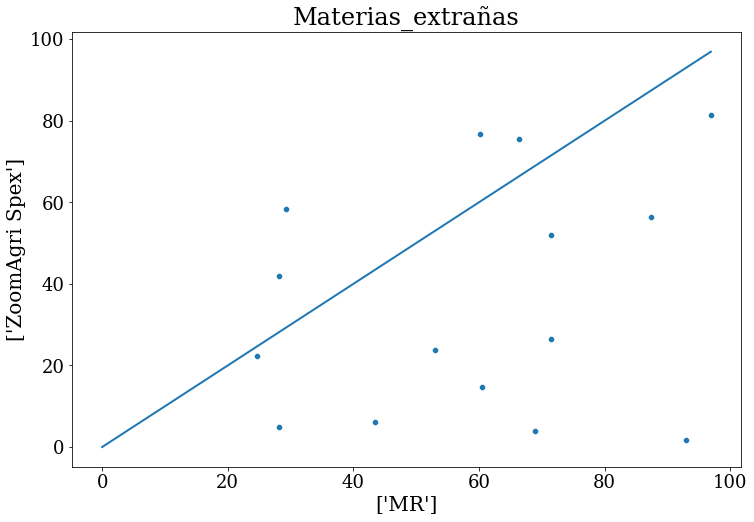

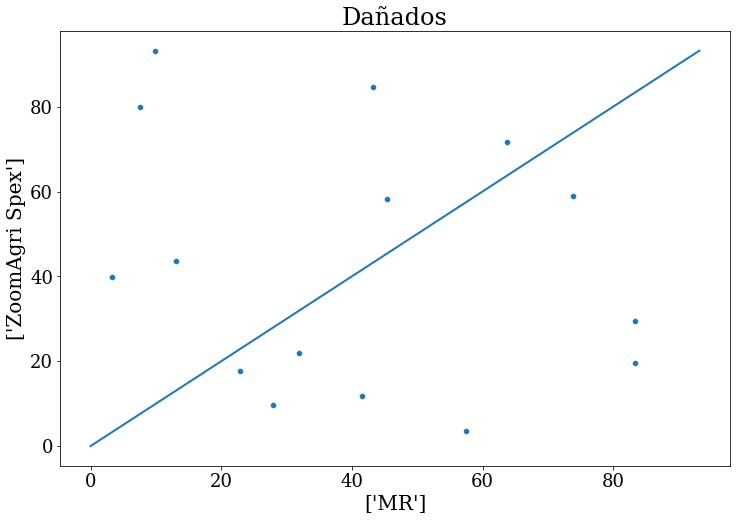

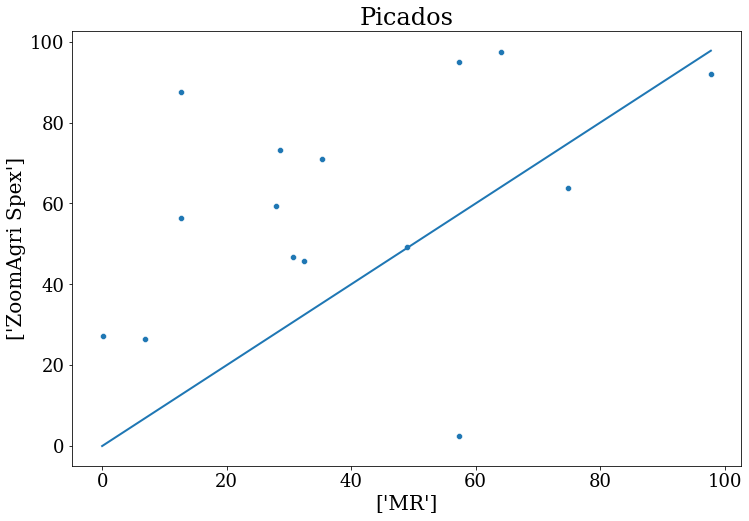

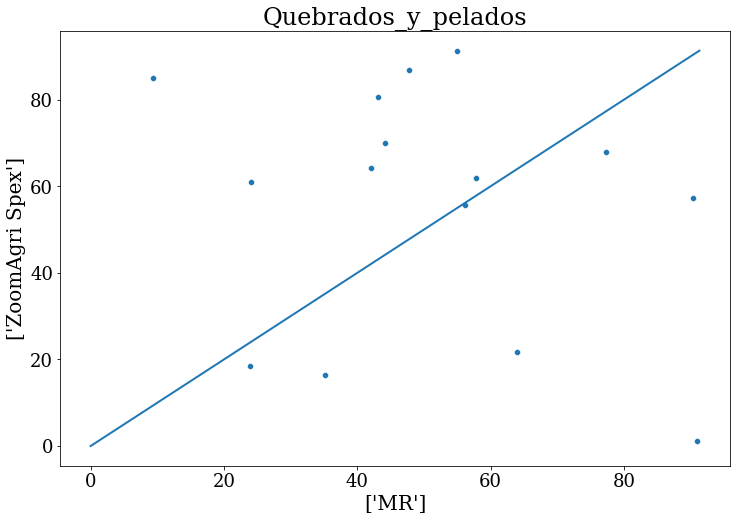

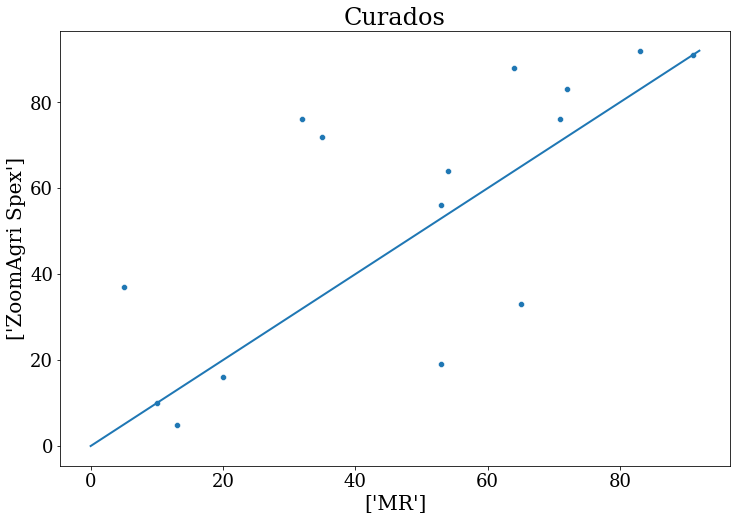

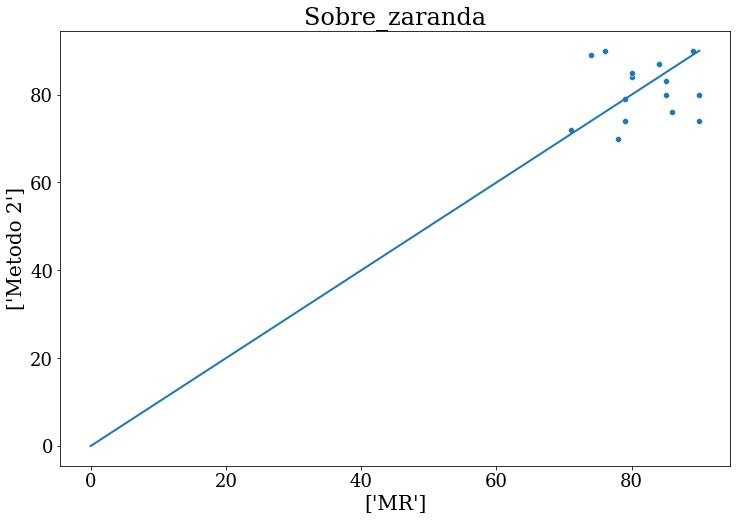

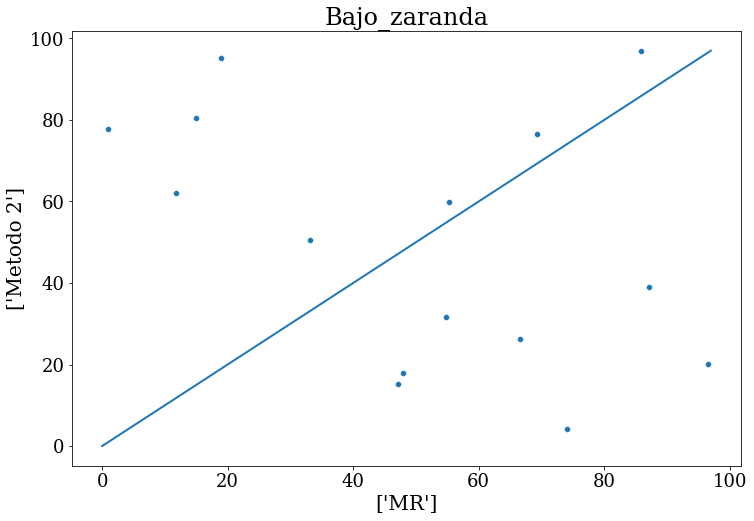

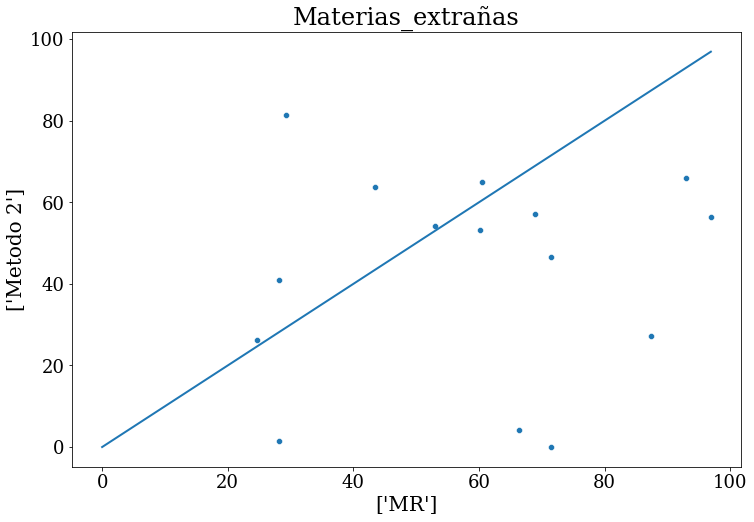

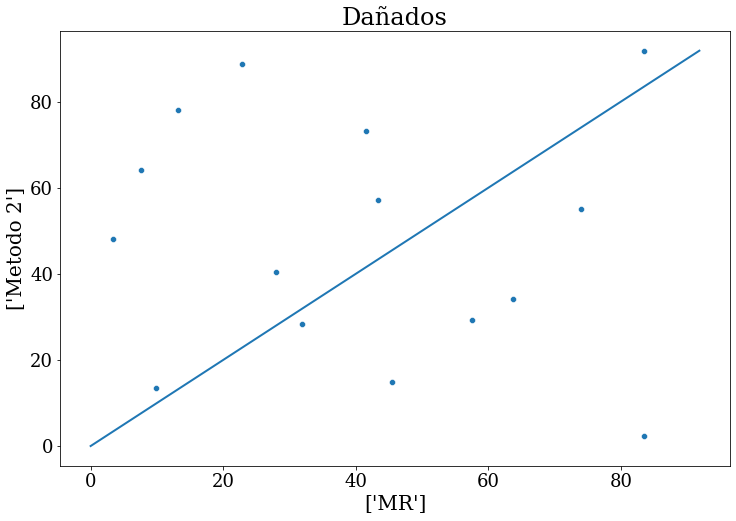

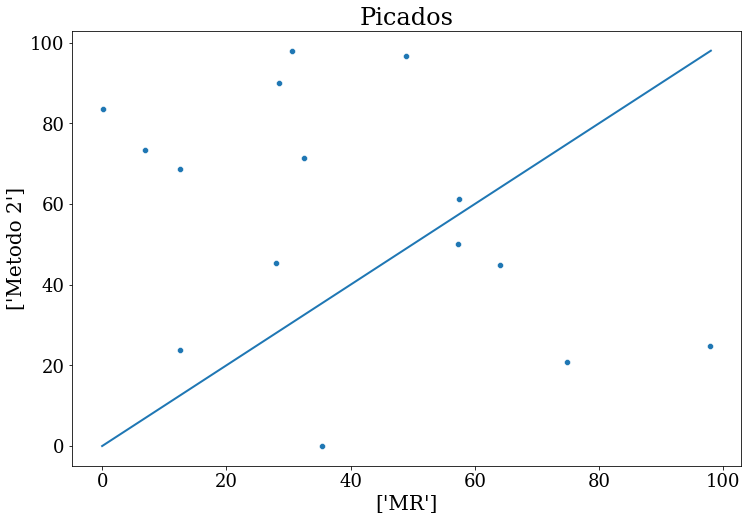

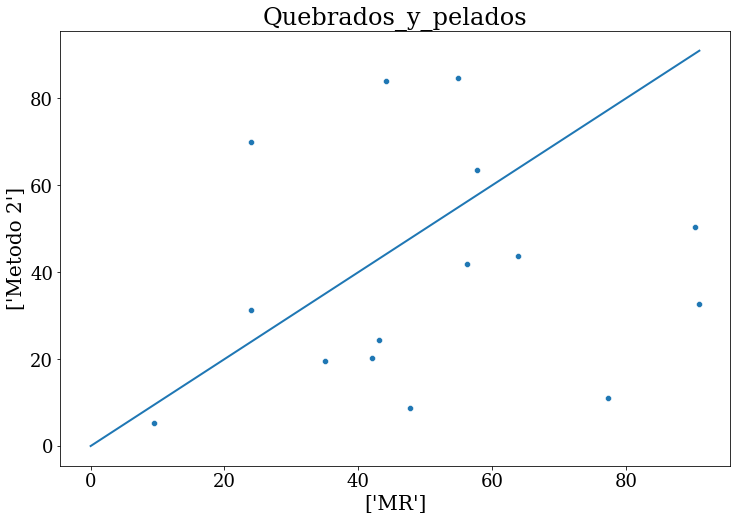

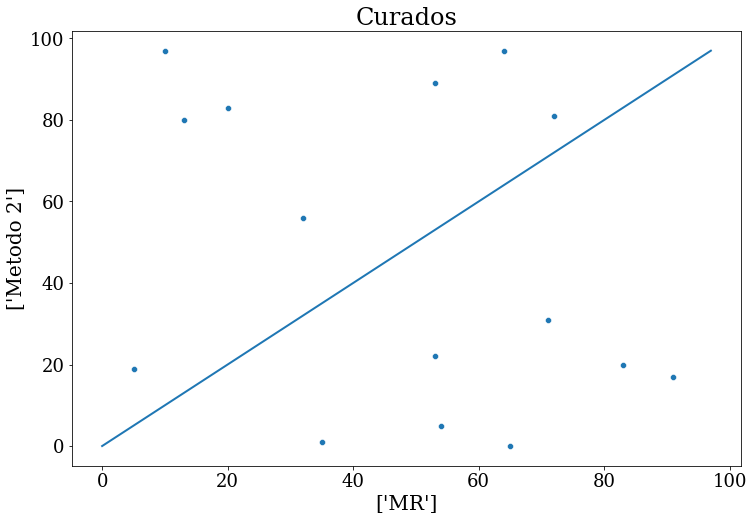

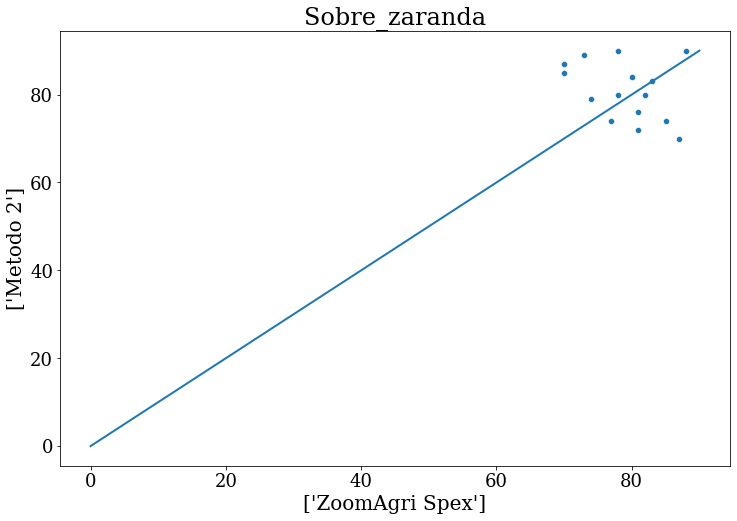

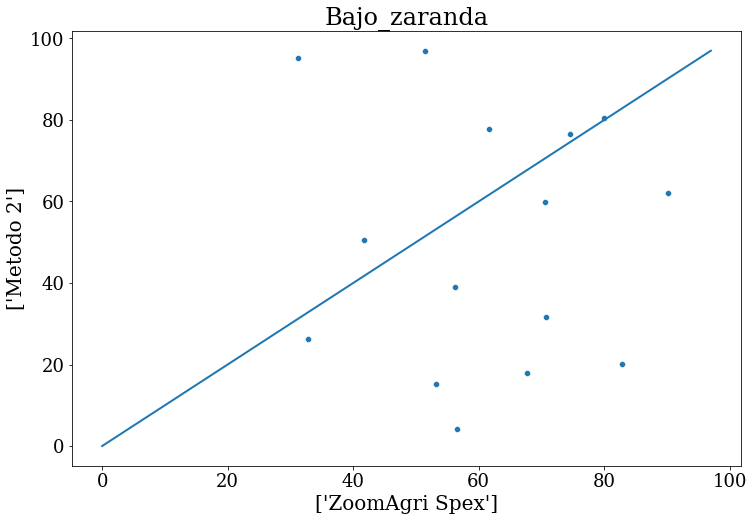

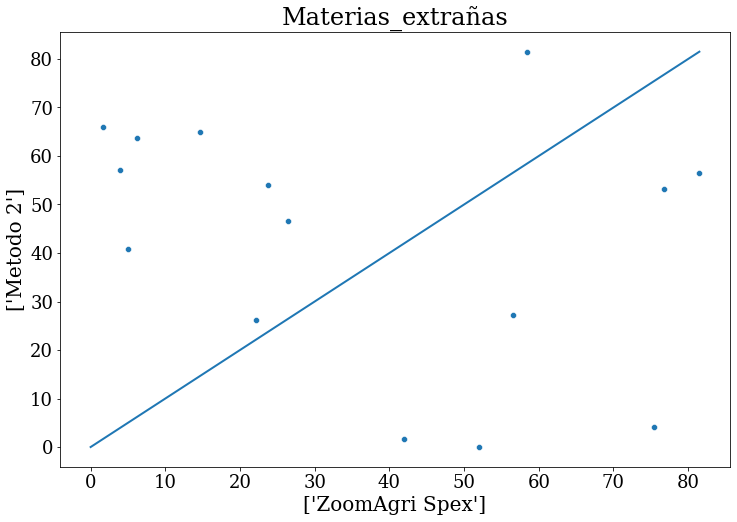

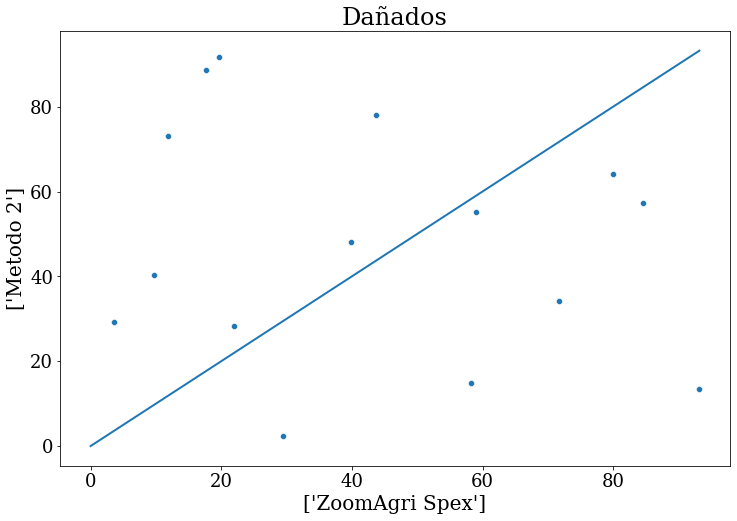

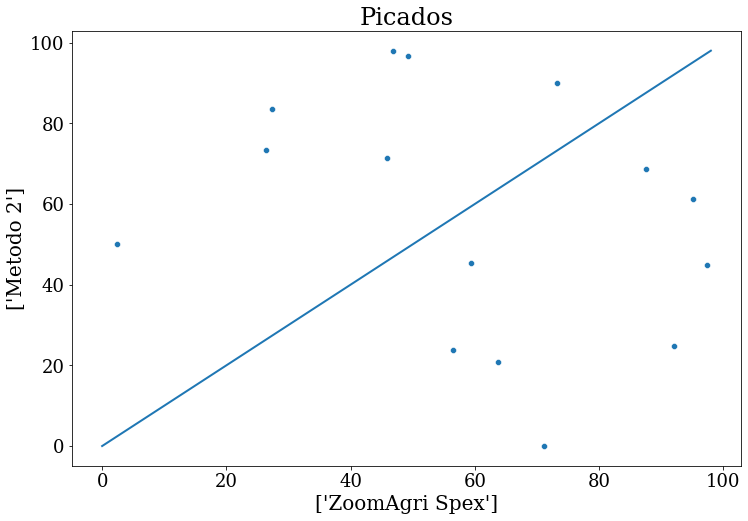

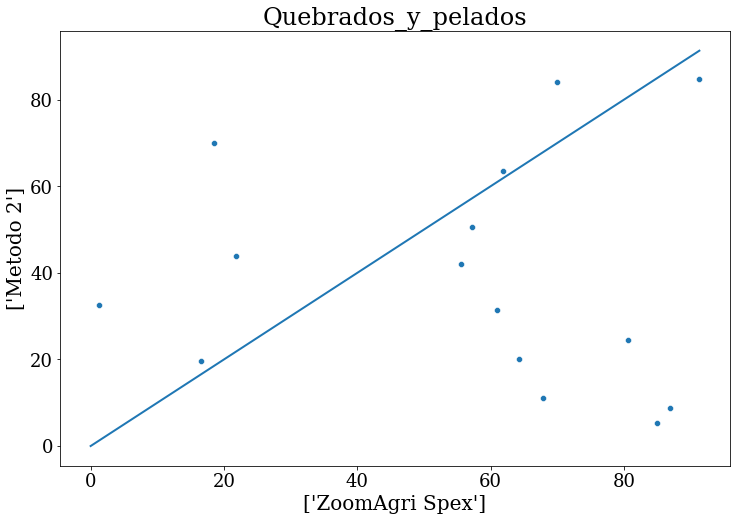

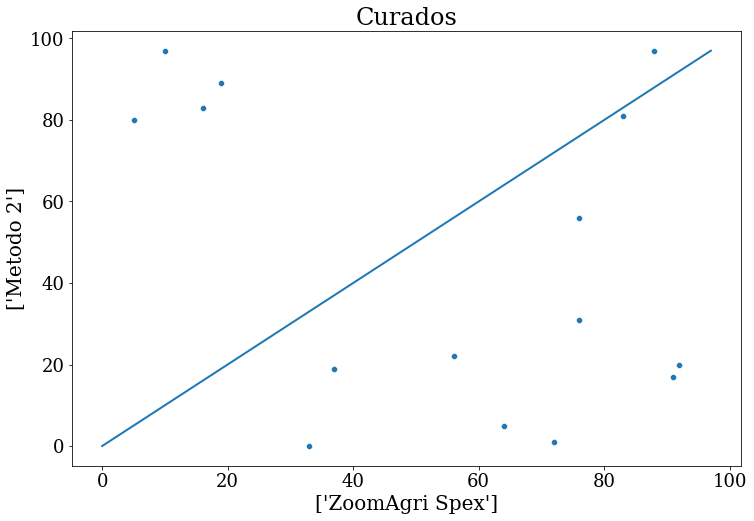

In [69]:
eg.qq_plot(data=df, clasif='Metodologia', cat=cat_norma, 
           save=True, folder=f'{fold}/{data_to_pull}/qq_plot')

#Add a error checking if array of values are not consistent

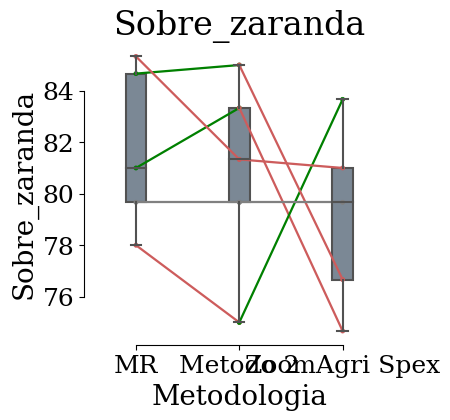

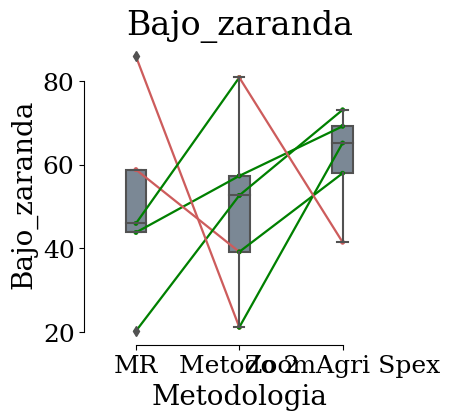

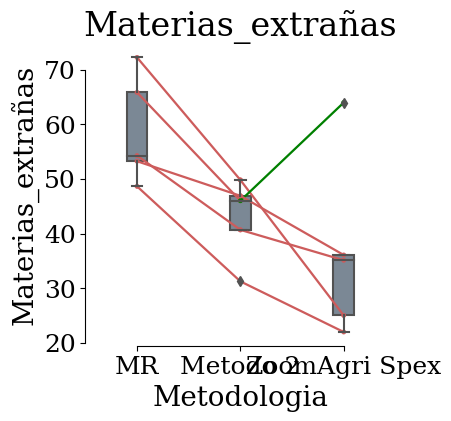

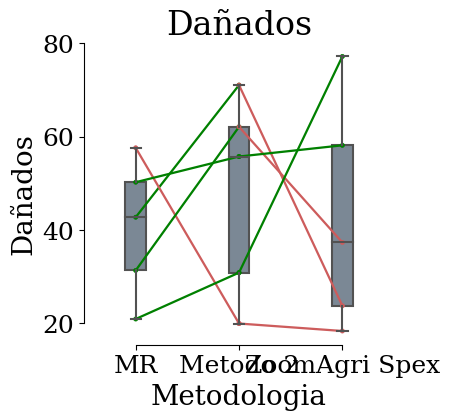

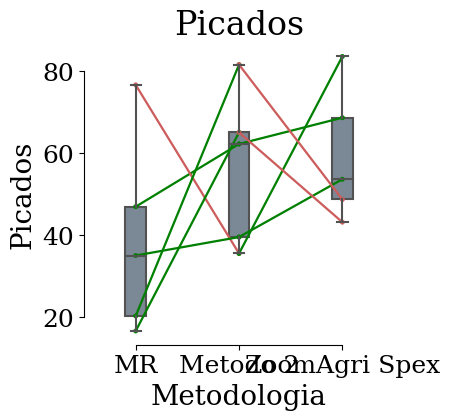

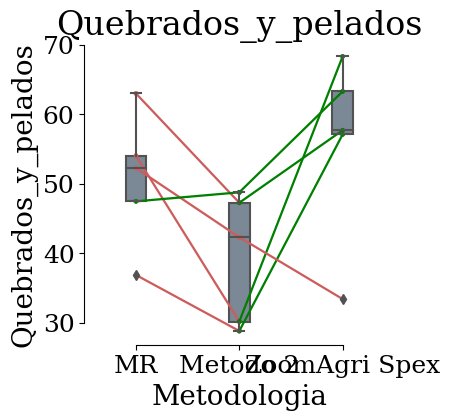

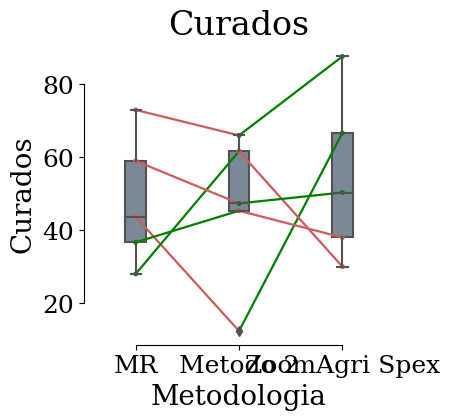

In [70]:
eg.pair_plot(data=df, x='Metodologia', cat=cat_norma, pair=plot_pair[data_to_pull],
             save=True, folder=f'{fold}/{data_to_pull}/pair_plot')

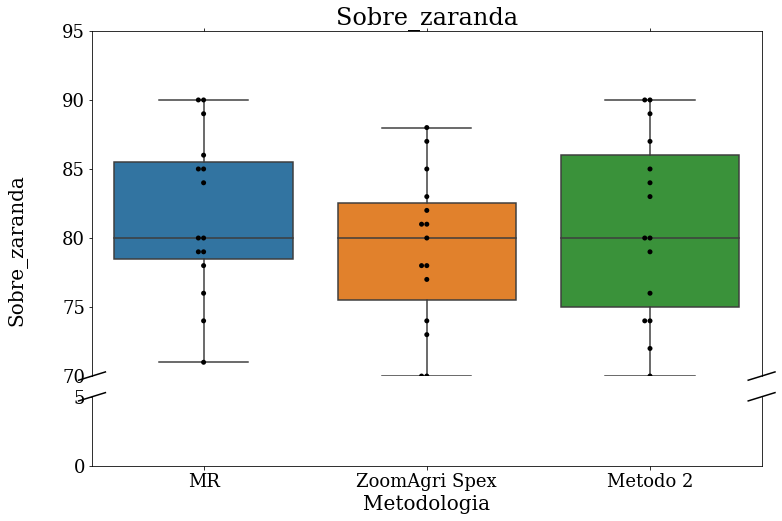

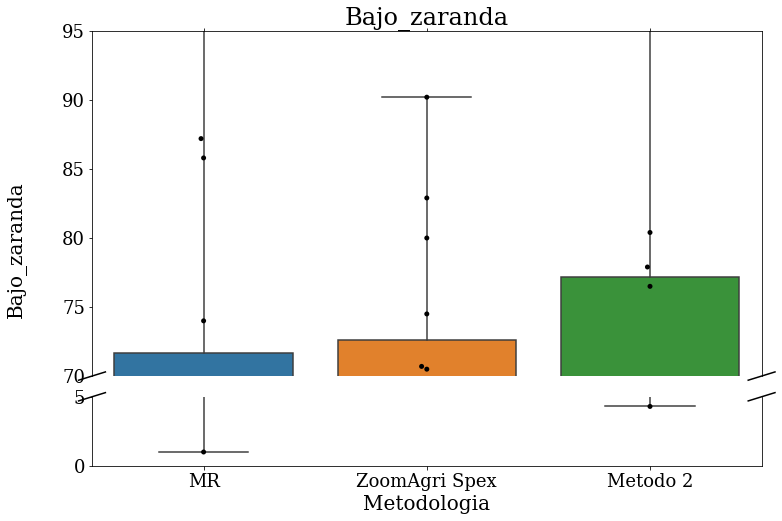

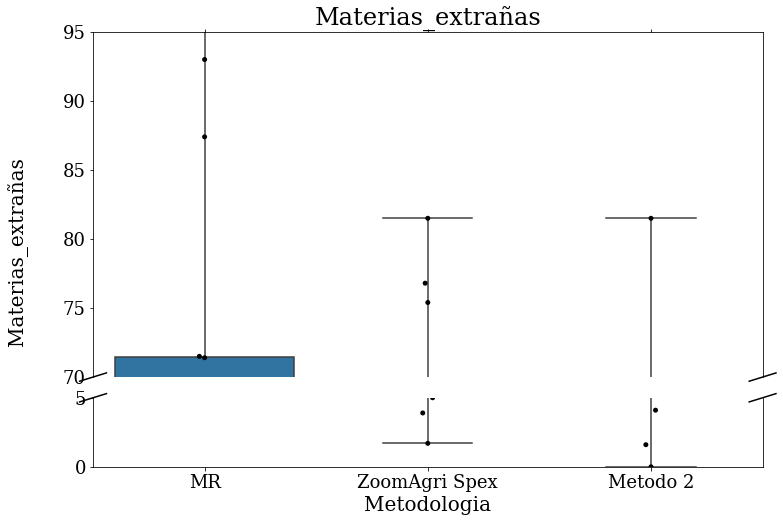

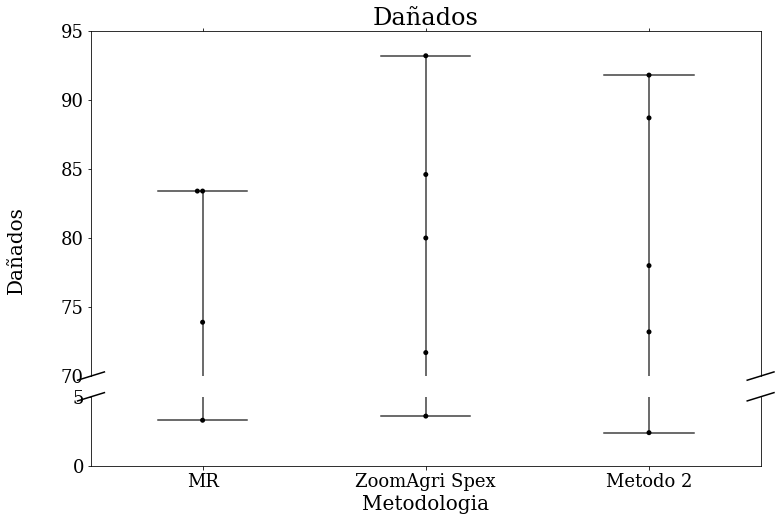

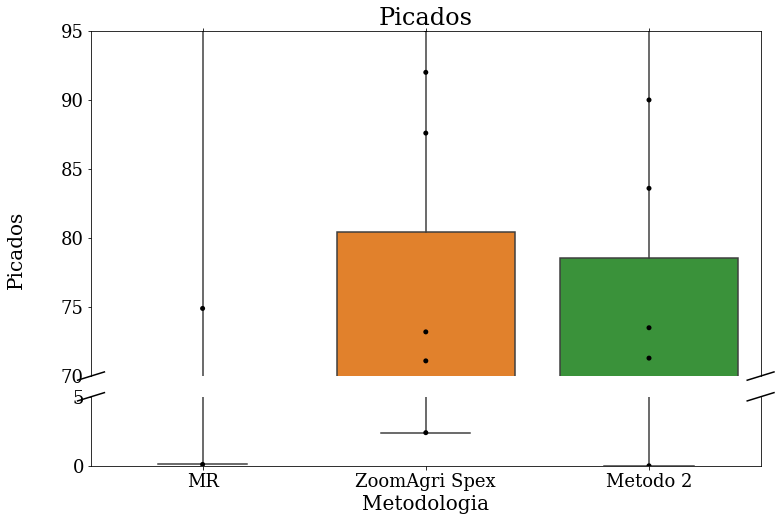

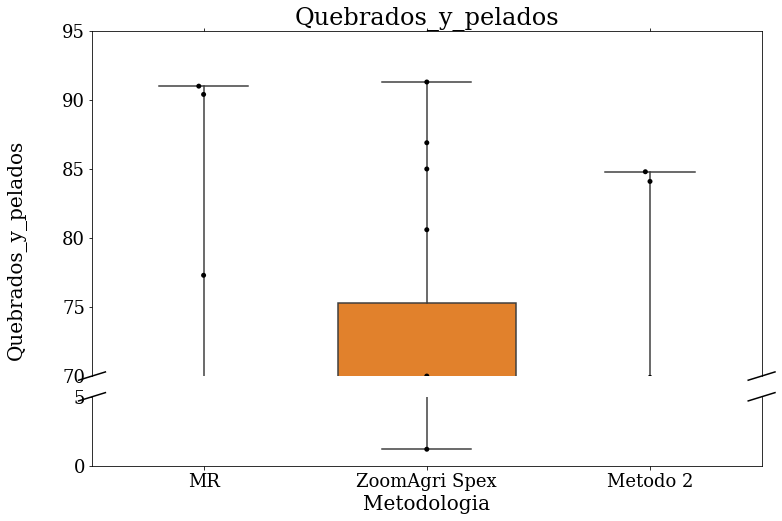

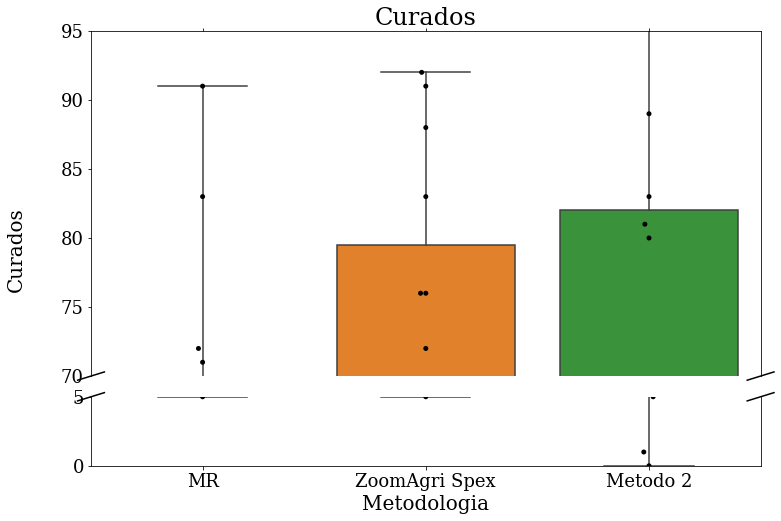

In [71]:
#Distribucion de los datos
if Commodity.lower() in broken_plot:
    eg.box_plot_broken(lims=[[70,95],[0, 5]], data=df, x='Metodologia', 
                    cat=cat_norma, save=True, 
                    folder=f'{fold}/{data_to_pull}/box_plot_data')
else:
    eg.boxplot(data=df, x='Metodologia', lims=None,
                   cat=cat_norma, save=True, 
                   folder=f'{fold}/{data_to_pull}/box_plot_data')



### Exploratory data analysis

#### Data

In [72]:
#General analisis of all samples
eda_general = eda.eda(df=df, dv=['Metodologia'], di=cat_norma, 
                      param=['mean', 'std', 'count'], save=True, folder=f'{fold}/{data_to_pull}', 
                      title=f'eda-{data_to_pull}')
eda_general

Metodologia             Category Metric      MR  Metodo 2  ZoomAgri Spex
3                   Bajo_zaranda  count  15.000    15.000         15.000
4                   Bajo_zaranda   mean  50.980    50.267         61.427
5                   Bajo_zaranda    std  29.805    30.639         17.622
18                       Curados  count  15.000    15.000         15.000
19                       Curados   mean  48.067    46.533         54.533
20                       Curados    std  27.434    37.574         31.552
9                        Dañados  count  15.000    15.000         15.000
10                       Dañados   mean  40.567    47.940         42.953
11                       Dañados    std  27.205    27.858         29.741
6              Materias_extrañas  count  15.000    15.000         15.000
7              Materias_extrañas   mean  58.840    42.920         36.420
8              Materias_extrañas    std  24.071    25.570         28.594
12                       Picados  count  15.000    15.000         15.000
13                       Picados   mean  39.173    56.847         59.607
14                       Picados    std  27.310    30.136         27.704
15           Quebrados_y_pelados  count  15.000    15.000         15.000
16           Quebrados_y_pelados   mean  50.727    39.460         55.967
17           Quebrados_y_pelados    std  23.520    26.345         28.348
0                  Sobre_zaranda  count  15.000    15.000         15.000
1                  Sobre_zaranda   mean  81.733    80.867         79.133
2                  Sobre_zaranda    std   5.837     6.664          5.630

In [73]:
#Diff absolute values.
diff_abs = eda.eda_diff(df=df, clasif='Metodologia', sub_index=eda_diff_sub_index[data_to_pull], abs=True,
                        save=True, folder=f'{fold}/{data_to_pull}', title=f'diff_abs-{data_to_pull}') 
diff_abs_eda = eda.eda(df=diff_abs, dv=['Diff'], di=cat_norma, 
                   param=['mean', 'std', 'count'], save=True, folder=f'{fold}/{data_to_pull}', 
                   title=f'eda_diff_abs-{data_to_pull}')
diff_abs_eda

Diff             Category Metric  MR_vs_Metodo 2  MR_vs_ZoomAgri Spex  \
3            Bajo_zaranda  count          15.000               15.000   
4            Bajo_zaranda   mean          41.940               27.807   
5            Bajo_zaranda    std          26.416               22.951   
18                Curados  count          15.000               15.000   
19                Curados   mean          45.933               16.867   
20                Curados    std          22.998               15.198   
9                 Dañados  count          15.000               15.000   
10                Dañados   mean          32.947               35.627   
11                Dañados    std          24.577               25.068   
6       Materias_extrañas  count          15.000               15.000   
7       Materias_extrañas   mean          28.280               31.580   
8       Materias_extrañas    std          23.628               23.124   
12                Picados  count          15.000               15.000   
13                Picados   mean          42.873               30.007   
14                Picados    std          26.014               19.938   
15    Quebrados_y_pelados  count          15.000               15.000   
16    Quebrados_y_pelados   mean          28.453               31.800   
17    Quebrados_y_pelados    std          19.178               25.016   
0           Sobre_zaranda  count          15.000               15.000   
1           Sobre_zaranda   mean           6.600                7.533   
2           Sobre_zaranda    std           5.302                4.658   

Diff  ZoomAgri Spex_vs_Metodo 2  
3                        15.000  
4                        29.413  
5                        22.175  
18                       15.000  
19                       49.067  
20                       27.686  
9                        15.000  
10                       36.307  
11                       24.671  
6                        15.000  
7                        38.700  
8                        18.841  
12                       15.000  
13                       41.693  
14                       17.622  
15                       15.000  
16                       32.987  
17                       26.618  
0                        15.000  
1                         8.000  
2                         6.164

In [74]:
#Diff relative values.
diff = eda.eda_diff(df=df, clasif='Metodologia', sub_index=eda_diff_sub_index[data_to_pull], abs=False,
                    save=True, folder=f'{fold}/{data_to_pull}', title=f'diff-{data_to_pull}') 
diff_eda = eda.eda(df=diff, dv=['Diff'], di=cat_norma, 
                   param=['mean', 'std', 'count'], save=True, 
                   folder=f'{fold}/{data_to_pull}', title=f'eda_diff-{data_to_pull}')
diff_eda

Diff             Category Metric  MR_vs_Metodo 2  MR_vs_ZoomAgri Spex  \
3            Bajo_zaranda  count          15.000               15.000   
4            Bajo_zaranda   mean           0.713              -10.447   
5            Bajo_zaranda    std          50.812               35.189   
18                Curados  count          15.000               15.000   
19                Curados   mean           1.533               -6.467   
20                Curados    std          52.792               22.158   
9                 Dañados  count          15.000               15.000   
10                Dañados   mean          -7.373               -2.387   
11                Dañados    std          41.338               44.522   
6       Materias_extrañas  count          15.000               15.000   
7       Materias_extrañas   mean          15.920               22.420   
8       Materias_extrañas    std          33.817               32.630   
12                Picados  count          15.000               15.000   
13                Picados   mean         -17.673              -20.433   
14                Picados    std          48.078               30.247   
15    Quebrados_y_pelados  count          15.000               15.000   
16    Quebrados_y_pelados   mean          11.267               -5.240   
17    Quebrados_y_pelados    std          33.154               40.986   
0           Sobre_zaranda  count          15.000               15.000   
1           Sobre_zaranda   mean           0.867                2.600   
2           Sobre_zaranda    std           8.601                8.675   

Diff  ZoomAgri Spex_vs_Metodo 2  
3                        15.000  
4                        11.160  
5                        35.850  
18                       15.000  
19                        8.000  
20                       57.249  
9                        15.000  
10                       -4.987  
11                       44.658  
6                        15.000  
7                        -6.500  
8                        43.753  
12                       15.000  
13                        2.760  
14                       46.528  
15                       15.000  
16                       16.507  
17                       39.779  
0                        15.000  
1                        -1.733  
2                        10.166

#### Graphical representation.

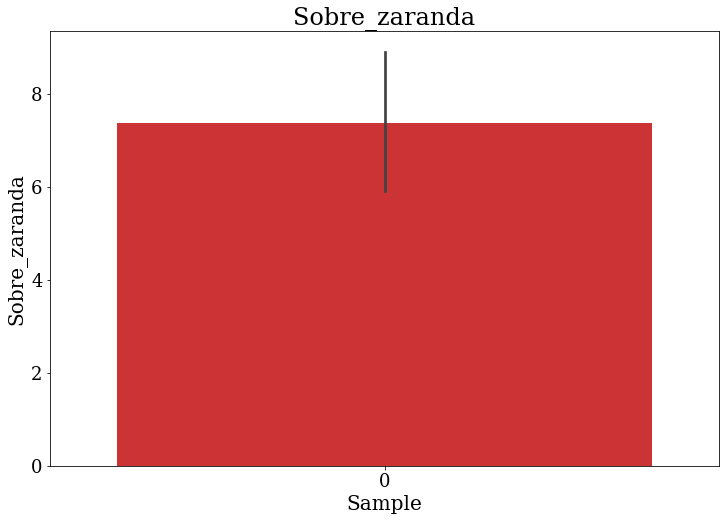

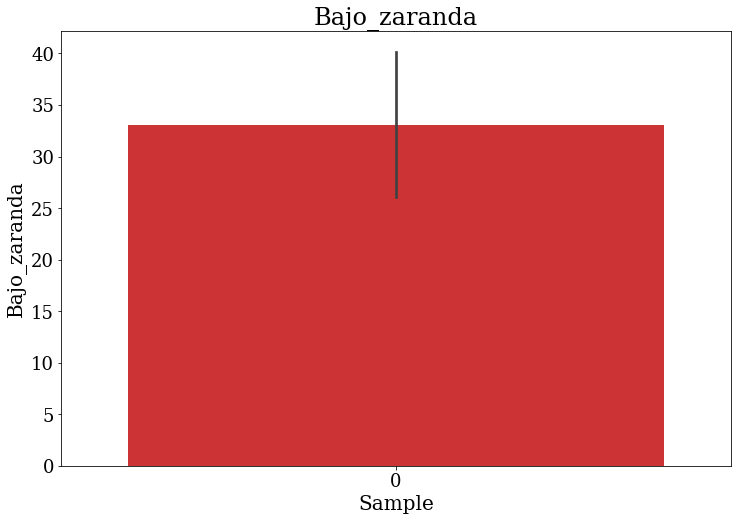

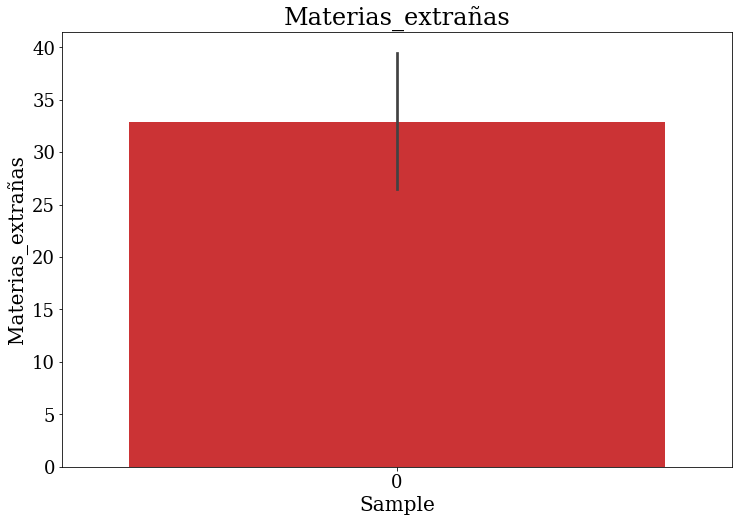

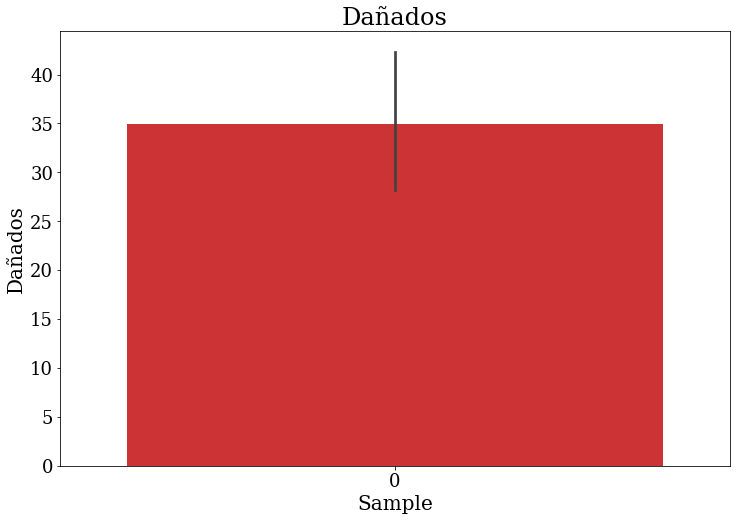

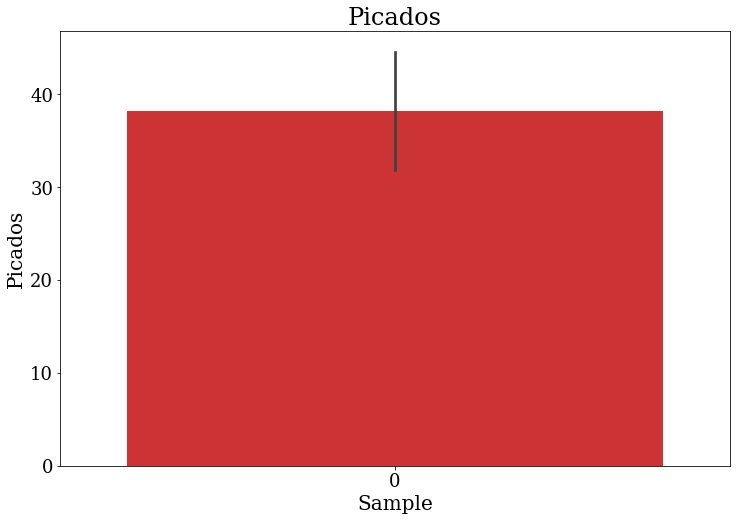

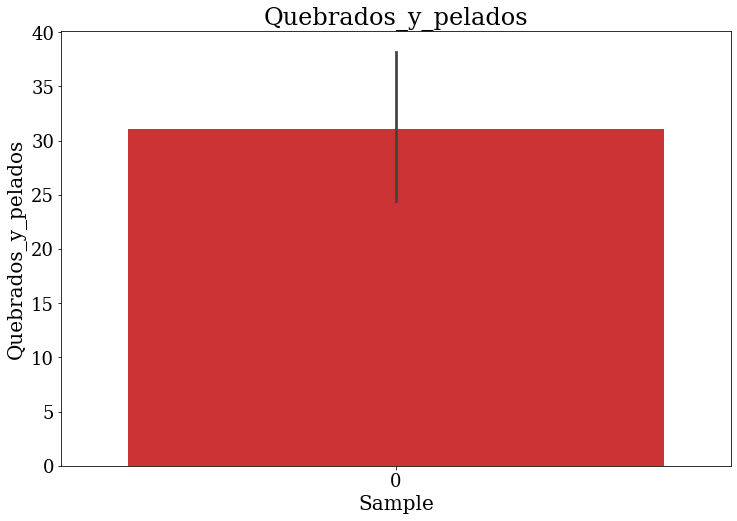

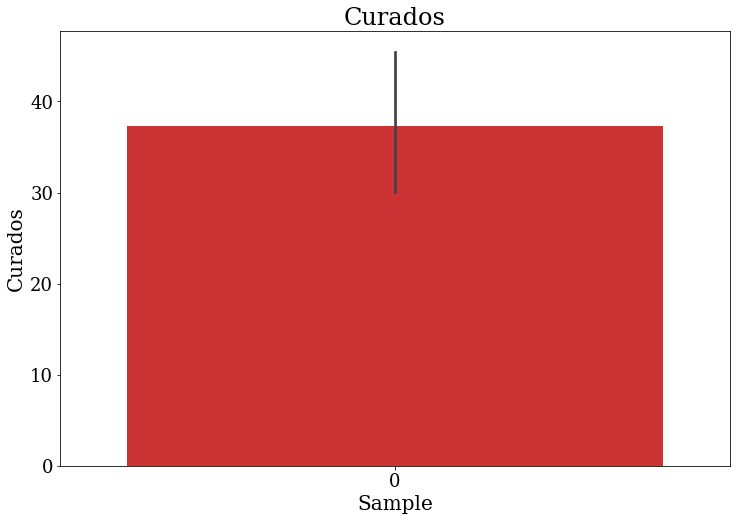

In [75]:
eg.bar_plot(ci=IC, data=diff_abs, x=eda_diff_bar_plot[data_to_pull], cat=cat_norma, 
            save=True, folder=f'{fold}/{data_to_pull}/bar_plot')

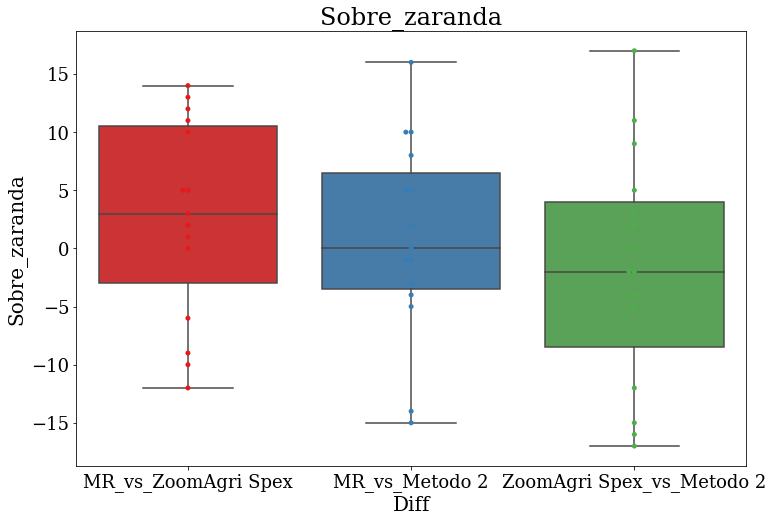

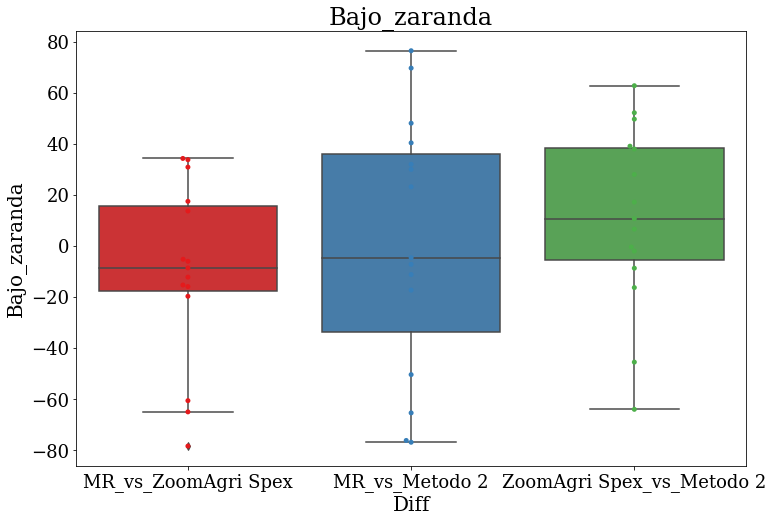

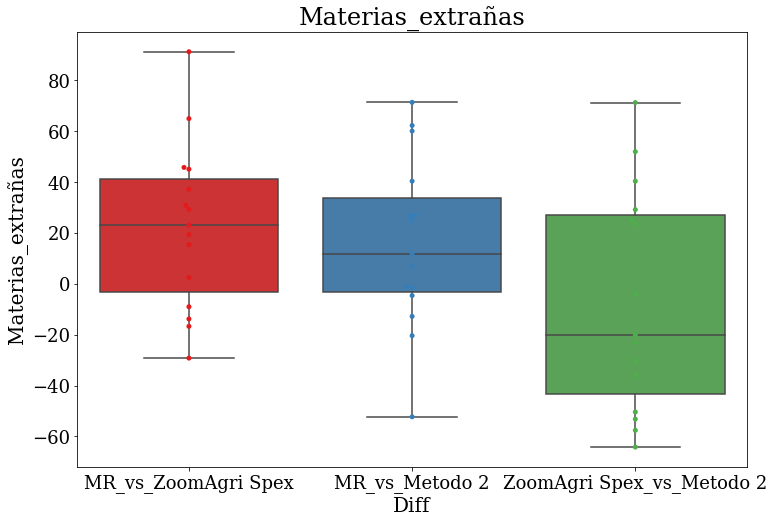

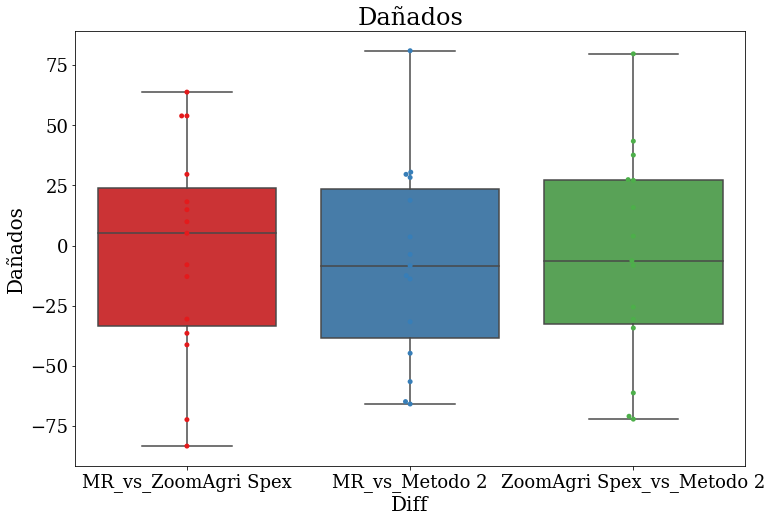

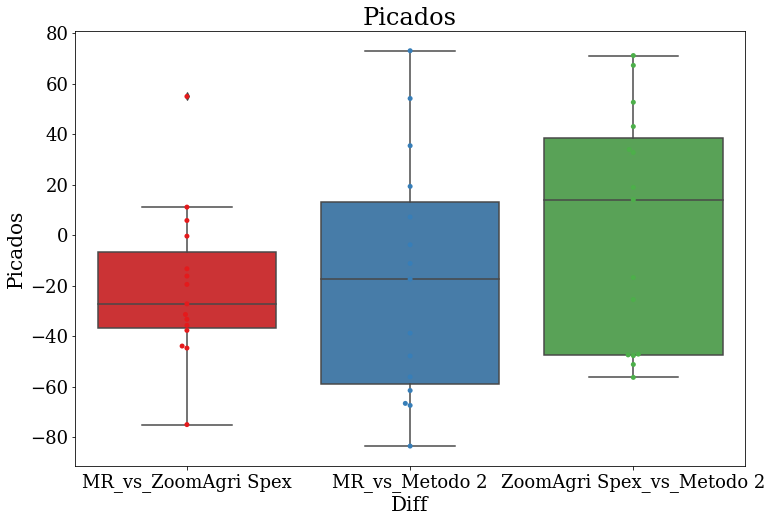

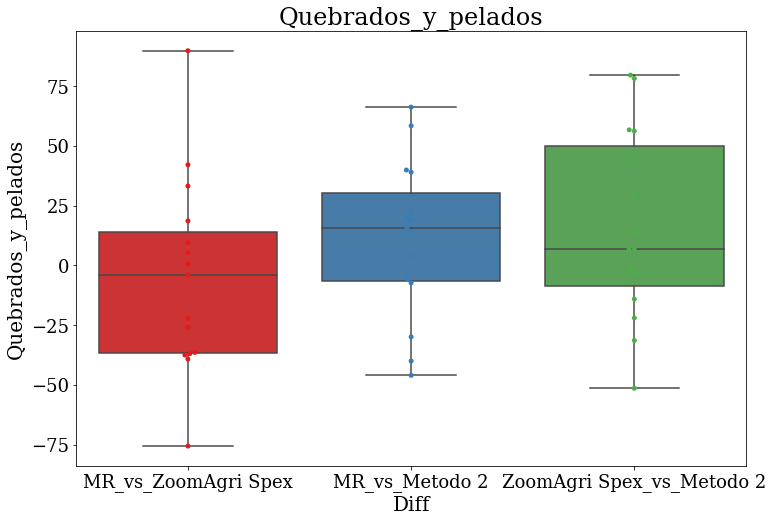

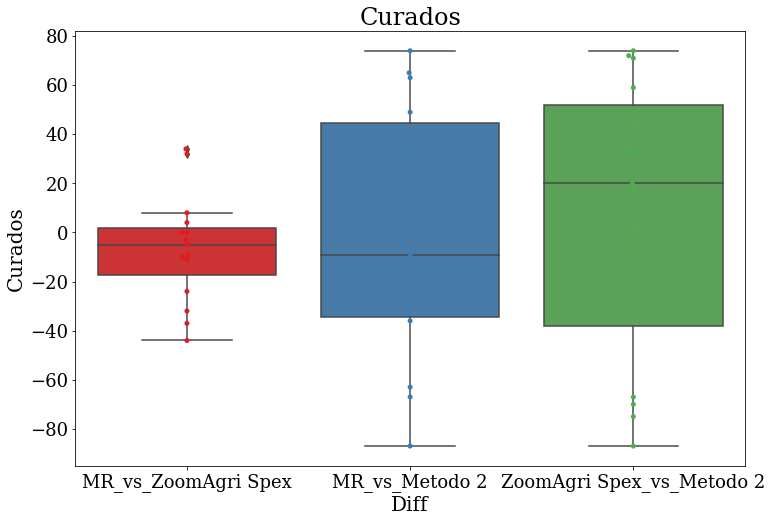

In [76]:
eg.boxplot(data=diff, x='Diff', cat=cat_norma,
           save=True, folder=f'{fold}/{data_to_pull}/box_plot_diff')

### Data Analysis

#### Analisis. Anova

Repetibilidad.ZoomAgri Spex - Sobre_zaranda 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:          Sobre_zaranda   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     8.765
Date:                Wed, 22 Jun 2022   Prob (F-statistic):              0.102
Time:                        19:56:49   Log-Likelihood:                -10.154
No. Observations:                   5   AIC:                             26.31
Df Residuals:                       2   BIC:                             25.14
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

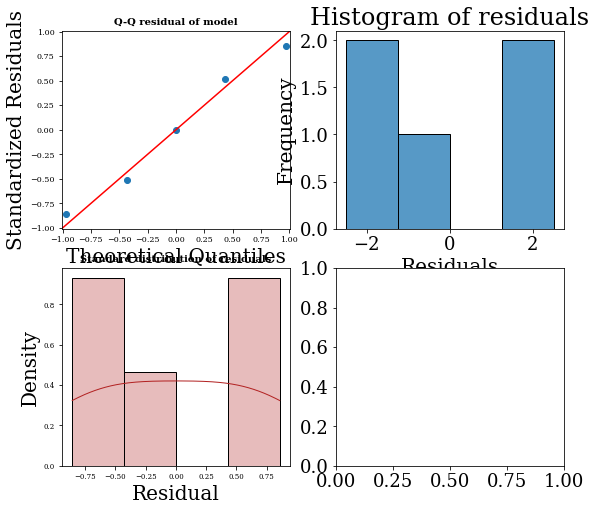

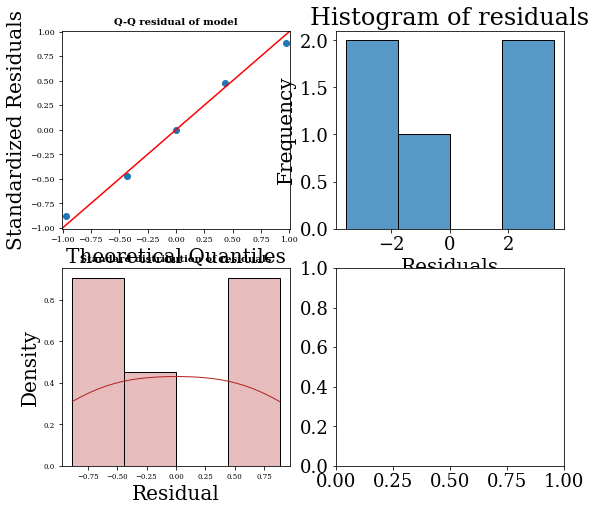

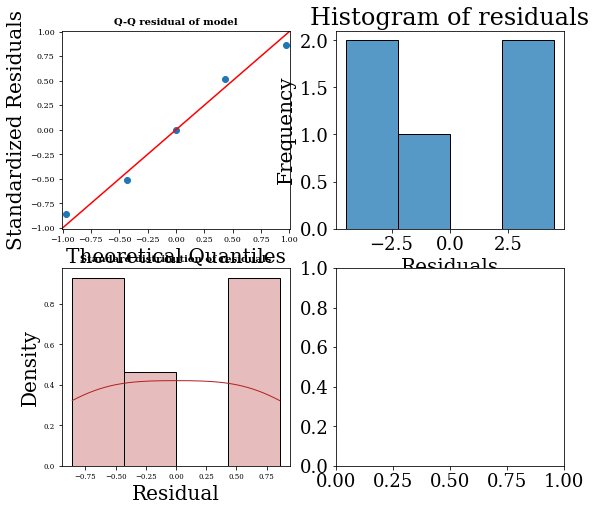

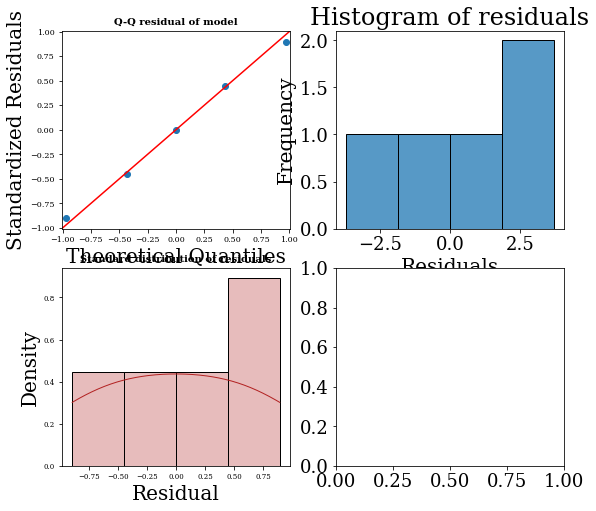

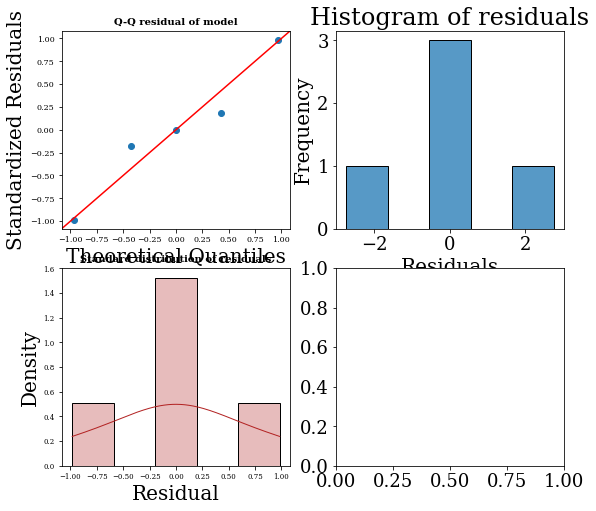

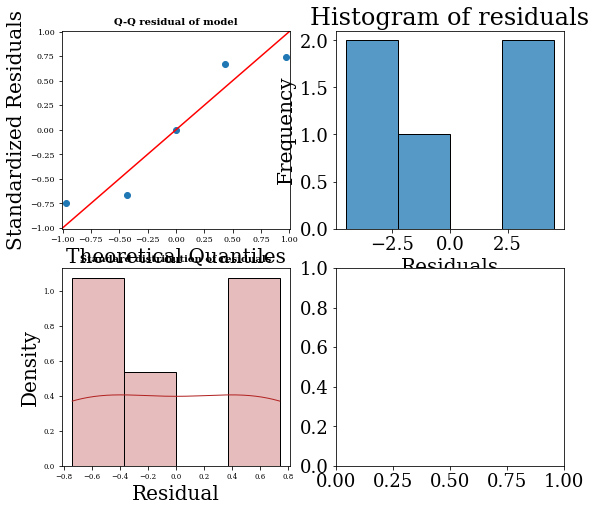

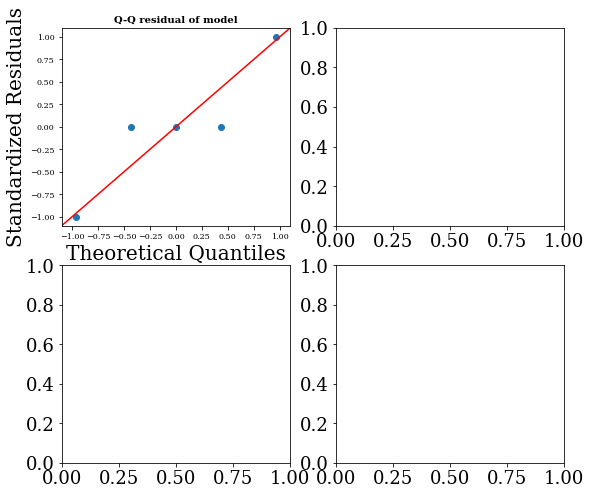

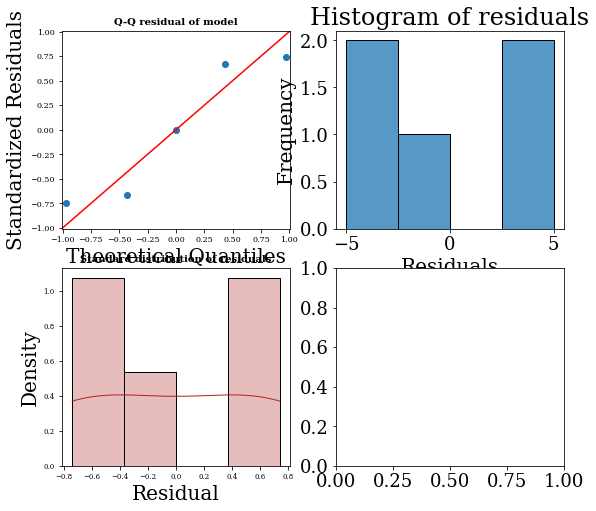

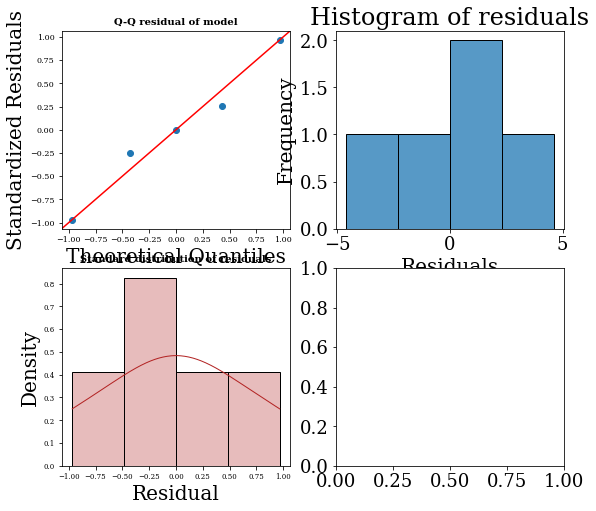

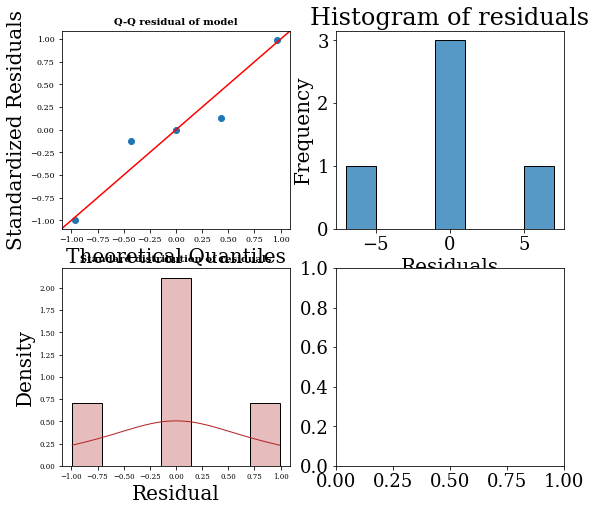

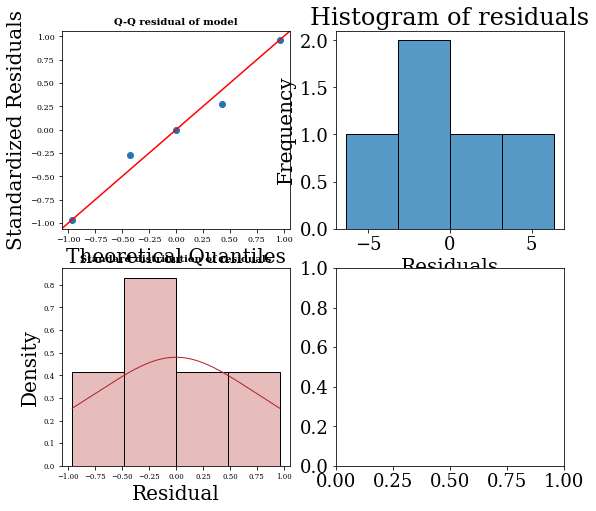

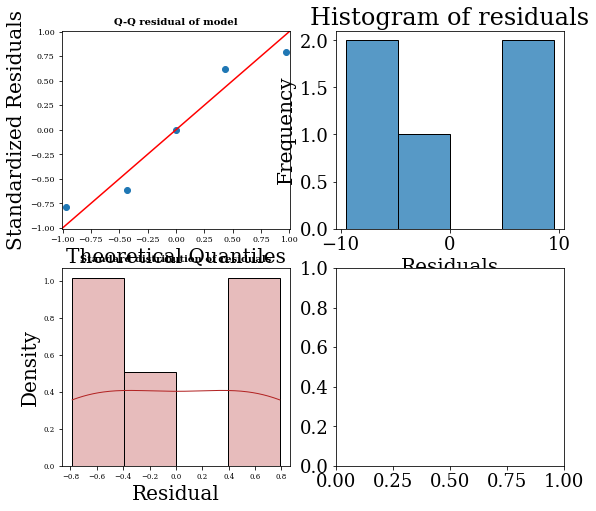

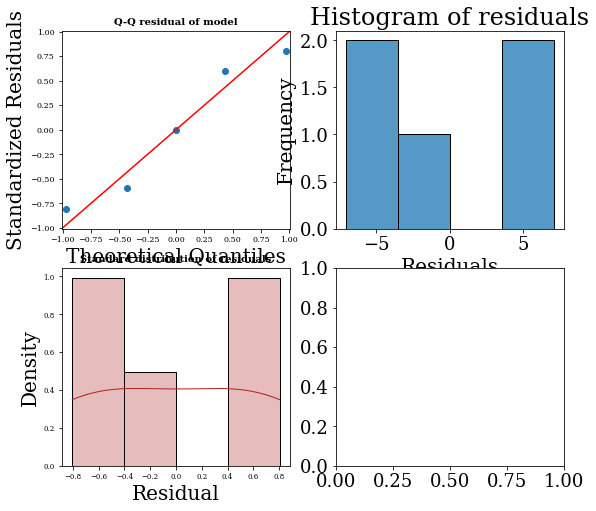

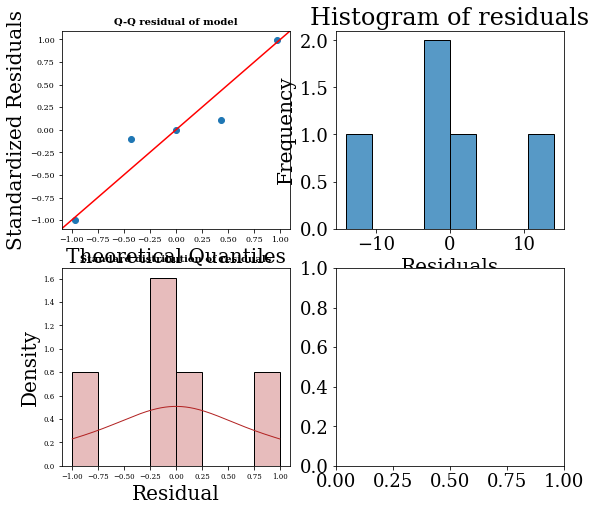

In [8]:
if data_to_pull == 'Repetibilidad':
    for i in df.Metodologia.unique():
        df1 = df[df['Metodologia']== i]
        anova.anova_report(df = df1,
                di = variables[data_to_pull],
                formula = formulas[data_to_pull],
                name = f'{data_to_pull}.{i}',
                Interaccion = False,
                alpha= alfa,
                file = f'Anova_report-{data_to_pull}_{i}.docx',
                norma = cat_norma,
                folder = fold)
else:
    anova.anova_report(df = df,
                di = variables[data_to_pull],
                formula = formulas[data_to_pull],
                name = data_to_pull,
                Interaccion = False,
                alpha= alfa,
                file = f'Anova_report-{data_to_pull}.docx',
                norma = cat_norma,
                folder = fold)

#### Analisis. Norms

Requires having at least one methodology that is used as a reference value

In [78]:
df_lim = na.norm_clasification(data=df, cat=cat_norma, norm_data=df_norma)
if data_to_pull in ['Repetibilidad', 'Exactitud_c_rep']:
    df_lim.drop(columns=['Rep'], inplace=True)
df_lim

Metodologia  id  Sample      Categoria  Result         Decision
0            MR   1       1  Sobre_zaranda    79.0       Tolerancia
1            MR   2       1  Sobre_zaranda    80.0       Tolerancia
2            MR   3       1  Sobre_zaranda    84.0  Base_Tolerancia
3            MR   4       2  Sobre_zaranda    78.0       Tolerancia
4            MR   5       2  Sobre_zaranda    71.0       Tolerancia
..          ...  ..     ...            ...     ...              ...
310    Metodo 2  11       4        Curados    80.0       Tolerancia
311    Metodo 2  12       4        Curados    56.0       Tolerancia
312    Metodo 2  13       5        Curados    89.0       Tolerancia
313    Metodo 2  14       5        Curados    22.0       Tolerancia
314    Metodo 2  15       5        Curados    31.0       Tolerancia

[315 rows x 6 columns]

In [79]:
df_lim2 = na.norm_desicion(data=df_lim, rv=rv_norm[data_to_pull], classifier='Metodologia', 
                        merger=[merger[data_to_pull], 'Categoria'])
df_lim2

Metodologia  id  Sample_x      Categoria  Result         Decision  \
0    ZoomAgri Spex   1         1  Sobre_zaranda    74.0       Tolerancia   
1    ZoomAgri Spex   2         1  Sobre_zaranda    80.0       Tolerancia   
2    ZoomAgri Spex   3         1  Sobre_zaranda    70.0       Tolerancia   
3    ZoomAgri Spex   4         2  Sobre_zaranda    87.0             Base   
4    ZoomAgri Spex   5         2  Sobre_zaranda    81.0  Base_Tolerancia   
..             ...  ..       ...            ...     ...              ...   
205       Metodo 2  11         4        Curados    80.0       Tolerancia   
206       Metodo 2  12         4        Curados    56.0       Tolerancia   
207       Metodo 2  13         5        Curados    89.0       Tolerancia   
208       Metodo 2  14         5        Curados    22.0       Tolerancia   
209       Metodo 2  15         5        Curados    31.0       Tolerancia   

     Sample_y  Result_rv      Decision_rv Accuracy  Diff  
0           1       79.0       Tolerancia       OK   5.0  
1           1       80.0       Tolerancia       OK   0.0  
2           1       84.0  Base_Tolerancia     Diff  14.0  
3           2       78.0       Tolerancia     Diff   9.0  
4           2       71.0       Tolerancia     Diff  10.0  
..        ...        ...              ...      ...   ...  
205         4       13.0       Tolerancia       OK  67.0  
206         4       32.0       Tolerancia       OK  24.0  
207         5       53.0       Tolerancia       OK  36.0  
208         5       53.0       Tolerancia       OK  31.0  
209         5       71.0       Tolerancia       OK  40.0  

[210 rows x 11 columns]

In [80]:
decision = na.decision_analysis(data=df_lim2, group_total=['Metodologia', 'Categoria'],
                             group_parcial=['Decision_rv', 'Accuracy'], 
                             counter=['Result'], save=True, name=f'decision_analysis-{data_to_pull}', 
                         folder=f'{fold}/{data_to_pull}')
decision

Categoria      Decision_rv    Metodologia Accuracy  \
0          Bajo_zaranda  Base_Tolerancia       Metodo 2     Diff   
1          Bajo_zaranda       Tolerancia       Metodo 2       OK   
2               Curados       Tolerancia       Metodo 2     Diff   
3               Curados       Tolerancia       Metodo 2       OK   
4               Dañados       Tolerancia       Metodo 2       OK   
5     Materias_extrañas       Tolerancia       Metodo 2     Diff   
6     Materias_extrañas       Tolerancia       Metodo 2       OK   
7               Picados  Base_Tolerancia       Metodo 2     Diff   
8               Picados       Tolerancia       Metodo 2     Diff   
9               Picados       Tolerancia       Metodo 2       OK   
10  Quebrados_y_pelados       Tolerancia       Metodo 2       OK   
11        Sobre_zaranda             Base       Metodo 2     Diff   
12        Sobre_zaranda             Base       Metodo 2       OK   
13        Sobre_zaranda  Base_Tolerancia       Metodo 2     Diff   
14        Sobre_zaranda       Tolerancia       Metodo 2     Diff   
15        Sobre_zaranda       Tolerancia       Metodo 2       OK   
16         Bajo_zaranda  Base_Tolerancia  ZoomAgri Spex     Diff   
17         Bajo_zaranda       Tolerancia  ZoomAgri Spex       OK   
18              Curados       Tolerancia  ZoomAgri Spex       OK   
19              Dañados       Tolerancia  ZoomAgri Spex       OK   
20    Materias_extrañas       Tolerancia  ZoomAgri Spex       OK   
21              Picados  Base_Tolerancia  ZoomAgri Spex     Diff   
22              Picados       Tolerancia  ZoomAgri Spex       OK   
23  Quebrados_y_pelados       Tolerancia  ZoomAgri Spex     Diff   
24  Quebrados_y_pelados       Tolerancia  ZoomAgri Spex       OK   
25        Sobre_zaranda             Base  ZoomAgri Spex     Diff   
26        Sobre_zaranda  Base_Tolerancia  ZoomAgri Spex     Diff   
27        Sobre_zaranda       Tolerancia  ZoomAgri Spex     Diff   
28        Sobre_zaranda       Tolerancia  ZoomAgri Spex       OK   

    Result_parcial  Result_total        porc  
0                1            15    6.666667  
1               14            15   93.333333  
2                1            15    6.666667  
3               14            15   93.333333  
4               15            15  100.000000  
5                1            15    6.666667  
6               14            15   93.333333  
7                1            15    6.666667  
8                1            15    6.666667  
9               13            15   86.666667  
10              15            15  100.000000  
11               5            15   33.333333  
12               1            15    6.666667  
13               1            15    6.666667  
14               4            15   26.666667  
15               4            15   26.666667  
16               1            15    6.666667  
17              14            15   93.333333  
18              15            15  100.000000  
19              15            15  100.000000  
20              15            15  100.000000  
21               1            15    6.666667  
22              14            15   93.333333  
23               1            15    6.666667  
24              14            15   93.333333  
25               6            15   40.000000  
26               1            15    6.666667  
27               4            15   26.666667  
28               4            15   26.666667

In [81]:
range_class = na.range_generator(data=df_lim2, rv='Result_rv', diff='Diff')
range_2 = na.range_analysis(data=range_class, 
                         group_total=['Metodologia', 'Categoria', f'Decision_rv'],
                         group_parcial=['Rank', 'Accuracy'], counter=['Result'], 
                         mean_values=['Result', 'Result_rv', 'Diff', 'Porc_diff'],
                         save=True, name=f'range_analysis-{data_to_pull}', 
                         folder=f'{fold}/{data_to_pull}')
range_2

Categoria      Decision_rv         Rank    Metodologia Accuracy  \
0     Bajo_zaranda  Base_Tolerancia        >=100       Metodo 2     Diff   
1     Bajo_zaranda       Tolerancia   0.0 - 10.0       Metodo 2       OK   
2     Bajo_zaranda       Tolerancia  10.0 - 20.0       Metodo 2       OK   
3     Bajo_zaranda       Tolerancia  40.0 - 50.0       Metodo 2       OK   
4     Bajo_zaranda       Tolerancia  50.0 - 60.0       Metodo 2       OK   
..             ...              ...          ...            ...      ...   
105  Sobre_zaranda  Base_Tolerancia  10.0 - 20.0  ZoomAgri Spex     Diff   
106  Sobre_zaranda       Tolerancia   0.0 - 10.0  ZoomAgri Spex     Diff   
107  Sobre_zaranda       Tolerancia   0.0 - 10.0  ZoomAgri Spex       OK   
108  Sobre_zaranda       Tolerancia  10.0 - 20.0  ZoomAgri Spex     Diff   
109  Sobre_zaranda       Tolerancia  10.0 - 20.0  ZoomAgri Spex       OK   

     porc_casos  Result  Result_rv  Diff  Porc_diff  
0         100.0    77.9        1.0  76.9     7690.0  
1           7.1    59.8       55.2   4.6        8.3  
2          14.3    86.8       77.6   9.2       11.7  
3           7.1    31.6       54.8  23.2       42.3  
4          14.3    44.8       60.2  32.7       53.6  
..          ...     ...        ...   ...        ...  
105       100.0    70.0       84.0  14.0       16.7  
106        12.5    85.0       79.0   6.0        7.6  
107        37.5    75.7       77.7   2.0        2.6  
108        37.5    85.3       75.0  10.3       13.8  
109        12.5    70.0       80.0  10.0       12.5  

[110 rows x 10 columns]

## Dashboard

### Compiler of tables

In [31]:
folder = 'Results/Barley/Test_validation/Test_1/spex_barley_v31.0.3-2022-06-22'
compile_results(folder=folder)

In [2]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

In [6]:
folder = 'Results/Barley/Test_validation/Test_1/spex_barley_v31.0.3-2022-06-22/Compiler'
df = pd.read_excel(f'{folder}/range_analysis.xlsx')
df.head()

Evaluation      Category      Decision_rv         Rank  \
0  Comp_de_Metodologias  Bajo_zaranda  Base_Tolerancia  30.0 - 40.0   
1  Comp_de_Metodologias  Bajo_zaranda  Base_Tolerancia        >=100   
2  Comp_de_Metodologias  Bajo_zaranda       Tolerancia  10.0 - 20.0   
3  Comp_de_Metodologias  Bajo_zaranda       Tolerancia  20.0 - 30.0   
4  Comp_de_Metodologias  Bajo_zaranda       Tolerancia  20.0 - 30.0   

  Methodology Accuracy  porc_casos    Results  Resulst_rv      Diff  \
0    Metodo 2       OK   25.000000   0.800000       0.600  0.200000   
1    Metodo 2     Diff   75.000000   7.066667       2.200  4.866667   
2    Metodo 2       OK   11.538462  15.166667      16.400  2.700000   
3    Metodo 2     Diff    3.846154   3.300000       4.400  1.100000   
4    Metodo 2       OK   15.384615  10.550000      10.675  2.575000   

    Porc_diff  
0   33.330000  
1  281.400000  
2   16.533333  
3   25.000000  
4   24.045000

In [5]:
#grid parameters
Methods = df['Methodology'].unique().tolist()
Results = ['Diff', 'porc_casos']
cols = len(Methods)
rows = len(Results)

order_x_axis={'Rank': ['0.0 - 10.0', '10.0 - 20.0', '20.0 - 30.0','30.0 - 40.0', 
                       '40.0 - 50.0', '50.0 - 60.0', '60.0 - 70.0', '70.0 - 80.0',
                       '80.0 - 90.0','>=100']}

subplot_titles = []
specs = []

for method in Methods:
    col_list = []
    for result in Results:
        subtitle = method + ' ' + result
        subplot_titles.append(subtitle)
        spec = {'type':"domain"}
        col_list.append(spec)
    specs.append(col_list)
  
#Sublots structure    
fig  = make_subplots(
    specs=specs,
    subplot_titles=subplot_titles,
    rows=rows,
    cols=cols,
)
for i, method in enumerate(Methods):
    for j, result in enumerate(Results):
        data=df[(df['Methodology']==method)]
        data.reset_index(drop=True, inplace=True)
        fig.add_trace(go.Bar(x=df['Rank'], y=df[result], ), 
                    row=i+1, 
                    col=j+1)
        fig.update_traces(
            hoverinfo='label+percent', textinfo='value', textfont_size=12,
        )
        fig.update_annotations(
            font_size=12
            )
        fig.update_layout(
    title_text="Norm based result",
        )
fig = px.bar(df, x='Rank', y='Diff', color='Methodology', barmode="group",
                category_orders={'Rank': ['0.0 - 10.0', '10.0 - 20.0', 
                                            '20.0 - 30.0','30.0 - 40.0', 
                                            '40.0 - 50.0', '50.0 - 60.0', 
                                            '60.0 - 70.0', '70.0 - 80.0',
                                            '80.0 - 90.0','>=100']})
fig.update_layout(
    title = dict(
        text = 'title'
    ),
    transition_duration=500
    )
fig

In [ ]:

fig = make_subplots(rows=1, cols=2, shared_yaxes=True)
fig.add_trace(go.Bar(x=[1, 2, 3], y=[4, 5, 6],
                    marker=dict(color=[4, 5, 6], coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Bar(x=[1, 2, 3], y=[2, 3, 5],
                    marker=dict(color=[2, 3, 5], coloraxis="coloraxis")),
              1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()

In [5]:
#grid parameters
Methods = df['Methodology'].unique().tolist()
Decisions = df['Decision_rv'].unique().tolist()
rows = len(Methods)
cols = len(Decisions)

subplot_titles = []
specs = []

for method in Methods:
    row_list = []
    for decision in Decisions:
        title = method + ' ' + decision
        subplot_titles.append(title)
        spec = {'type':"domain"}
        row_list.append(spec)
    specs.append(row_list)
  
#Sublots structure    
fig  = make_subplots(
    specs=specs,
    subplot_titles=subplot_titles,
    rows=rows,
    cols=cols,
)

for i, method in enumerate(Methods):
    for j, decision in enumerate(Decisions):
        data=df[(df['Methodology']==method)&(df['Decision_rv']==decision)]
        data.reset_index(drop=True, inplace=True)
        fig.add_trace(go.Pie(labels=data['Accuracy'], 
                             values=data['Results_parcial'], 
                             sort=False), 
                    row=i+1, 
                    col=j+1)
        fig.update_traces(
            hoverinfo='label+percent', textinfo='value', textfont_size=12,
        )
        fig.update_annotations(
            font_size=12
            )
        fig.update_layout(
    title_text="Norm based decision",
        )


fig

In [ ]:
app.layout = html.Div([
        html.H1('Dash Tabs component demo'),
        dcc.Tabs(id="tabs", value='tab1', 
                 children=[
            dcc.Tab(label='Tab One', value='tab1',
                    children=[dcc.Tabs(id="subtabs", value="subtab1",
                        children = [dcc.Tab(label='Sub Tab1', value="subtab1", children=tab1_layout1)])]),
            
            
            dcc.Tab(label='Tab Two', value='tab2', children=tab2_layout1),
            dcc.Tab(label='Tab Three', value='tab3', children=tab3_layout1),
        ]),
        html.Div(id='tabs-content')
    ])

## Non standardize analysis

### Data

In [7]:
#import raw data
data_to_pull = 'Exactitud'
df_1 = import_data(Spreadsheet_id, File_id, data_to_pull)
df_1 = eh.standard_dataframe(df_1)
df_1

COMPLETE: Data copied
Metodologia             object
Sample                   int64
Sample_name             object
Sobre_zaranda          float64
Quebrados_y_pelados    float64
Dañados                float64
Materias_extrañas      float64
Bajo_zaranda           float64
Picados                  int64
Curados                  int64
dtype: object


MitoWidget(analysis_data_json='{"analysisName": "id-dvxlbjlvar", "analysisToReplay": null, "code": [], "stepSu…

#### Data Distribtion

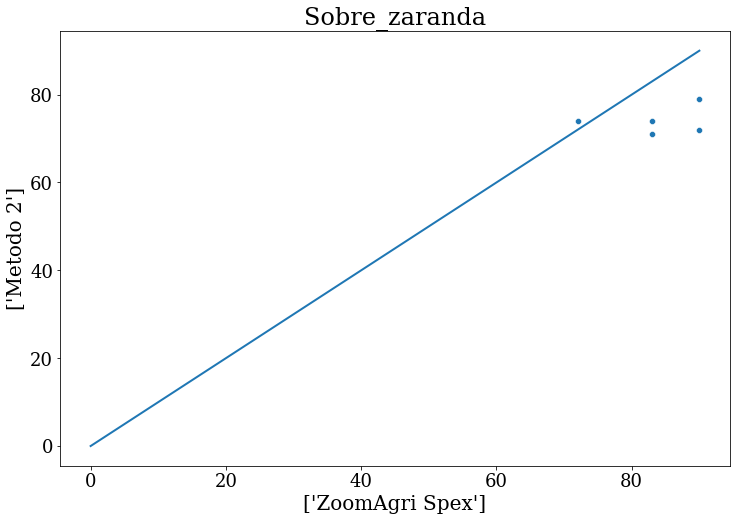

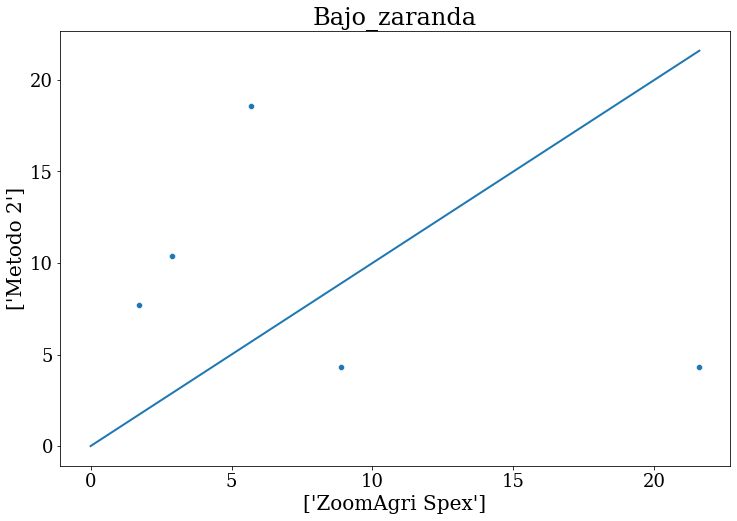

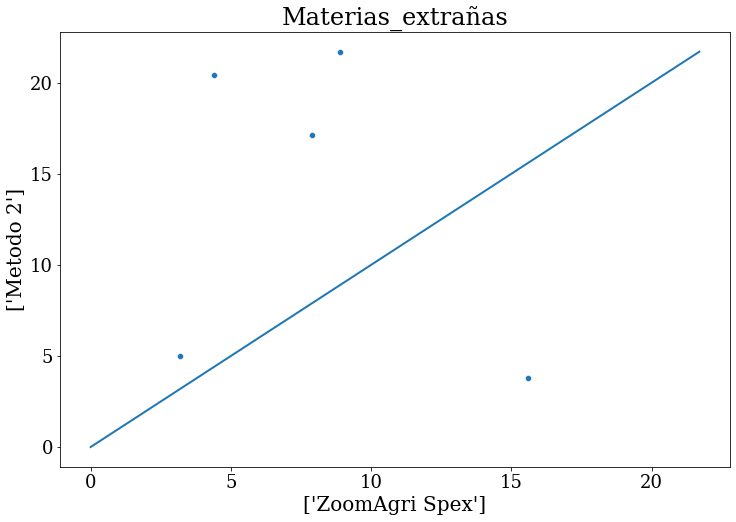

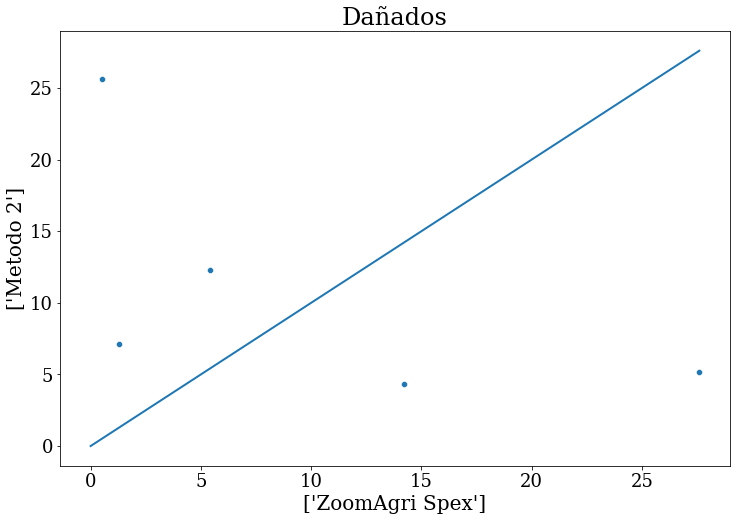

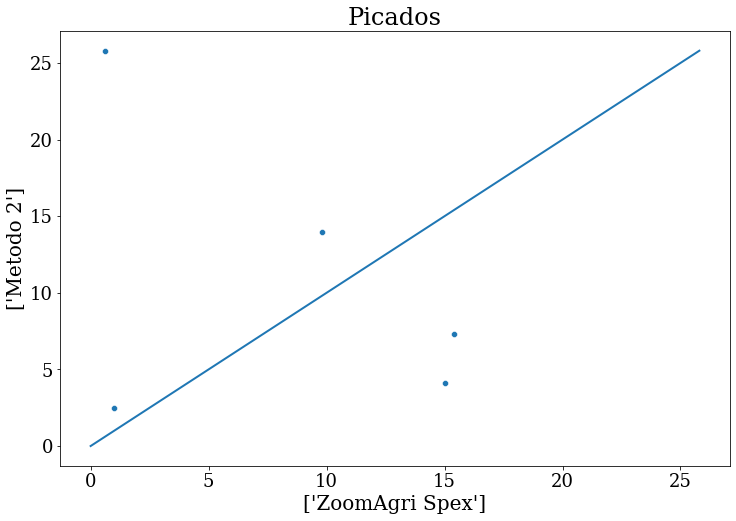

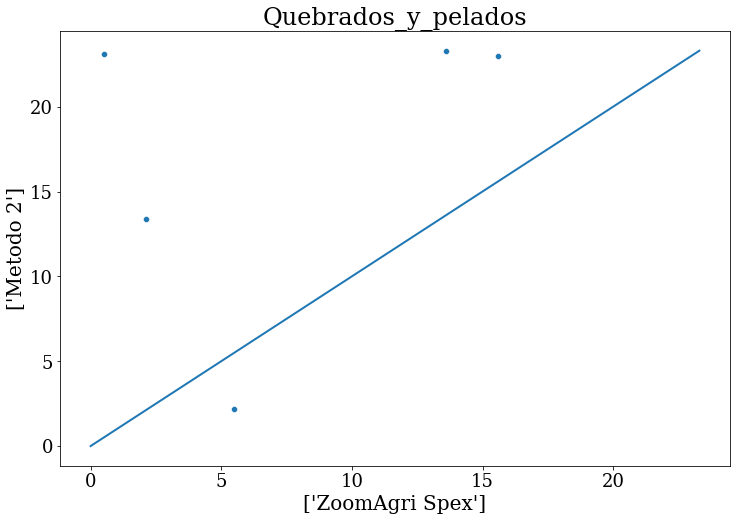

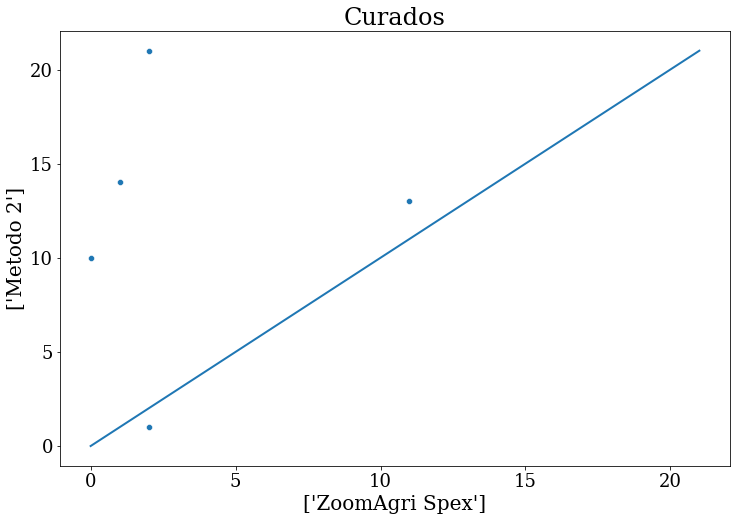

In [ ]:
eg.qq_plot(data=df_1, clasif='Metodologia', cat=cat_norma, 
           save=True, folder=f'{fold}/{data_to_pull}/qq_plot')

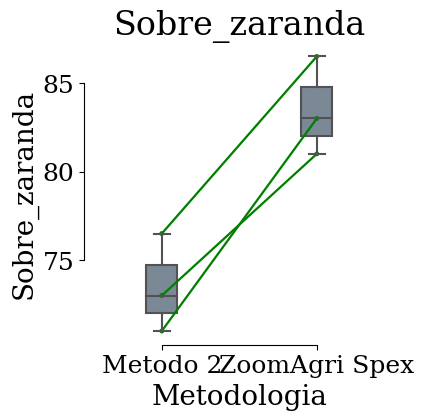

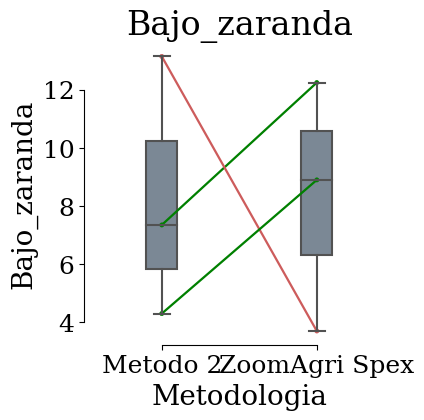

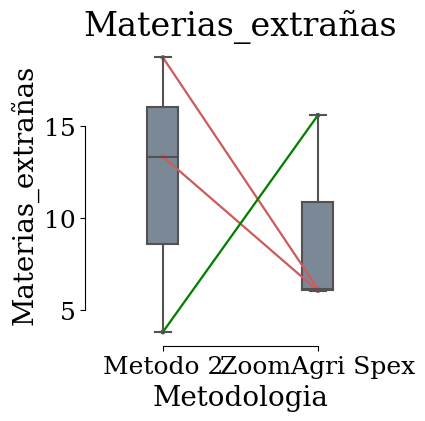

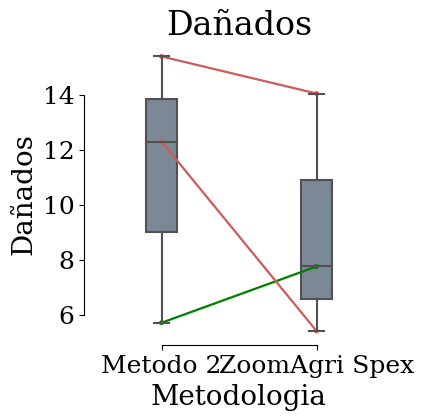

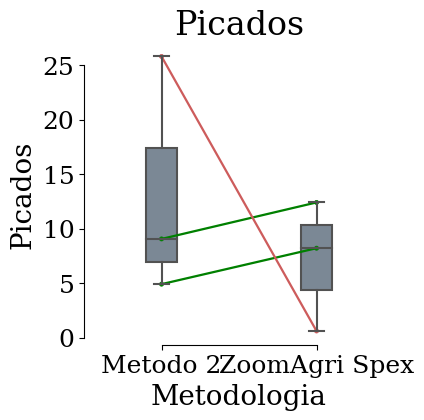

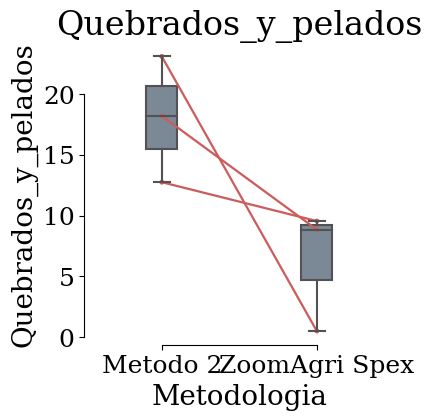

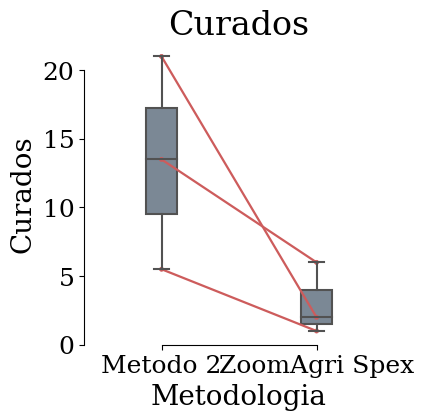

In [ ]:
eg.pair_plot(data=df_1, x='Metodologia', cat=cat_norma, pair='Sample',
             save=True, folder=f'{fold}/{data_to_pull}/pair_plot')

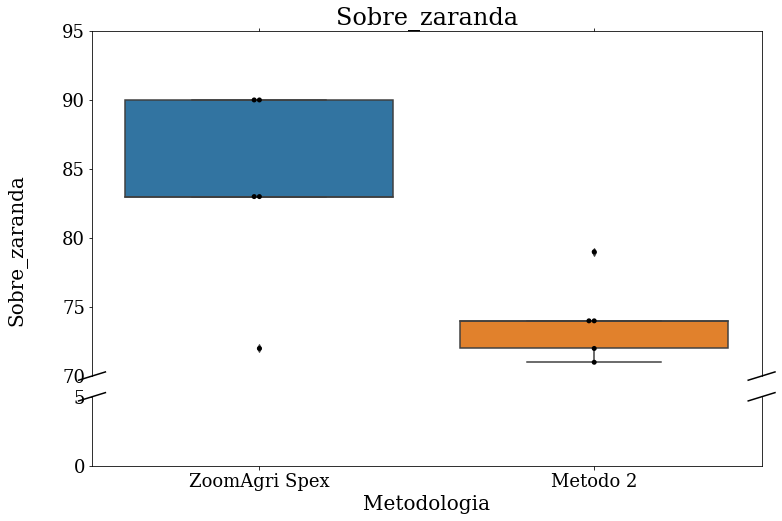

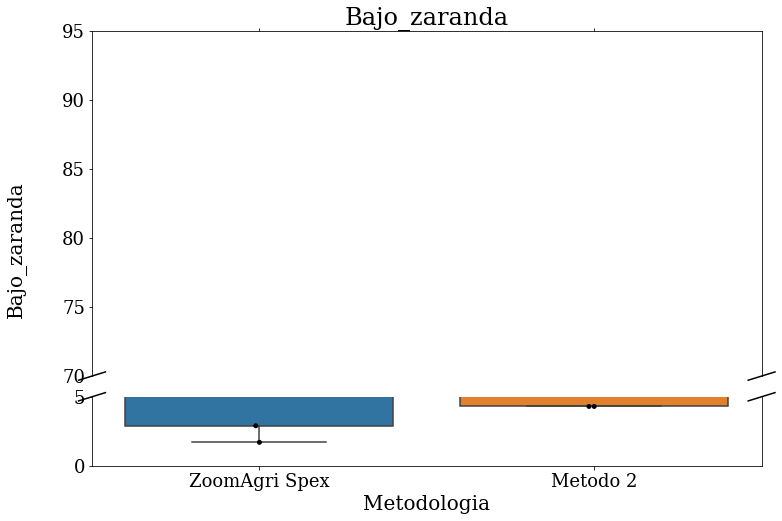

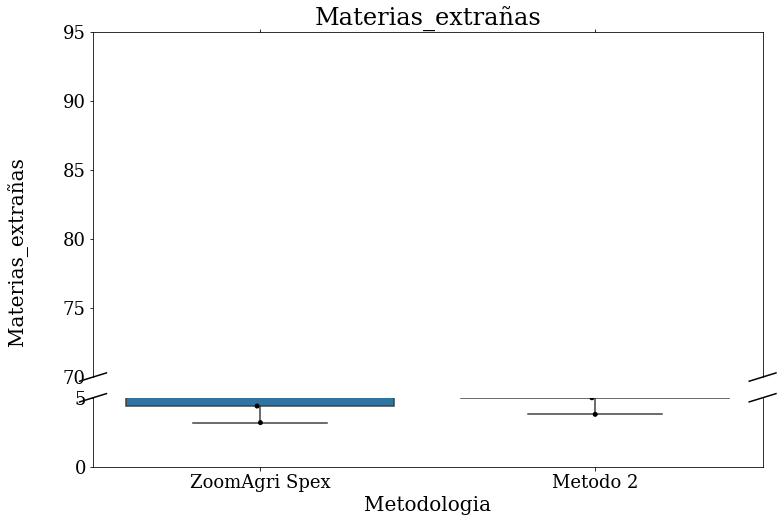

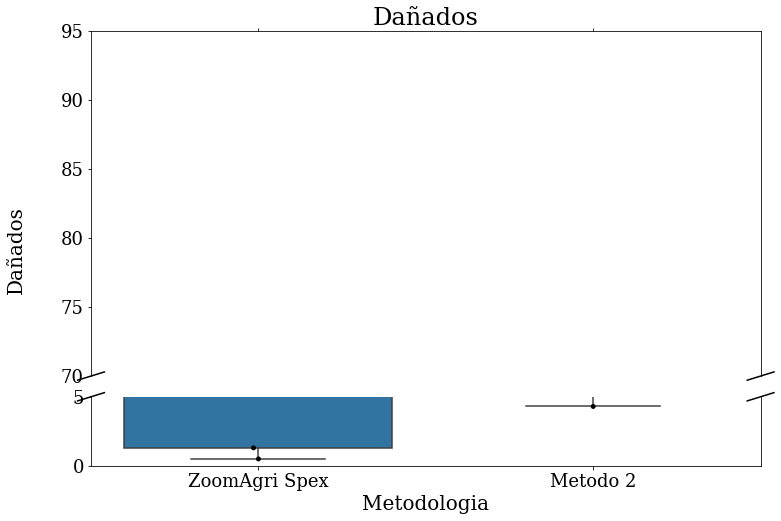

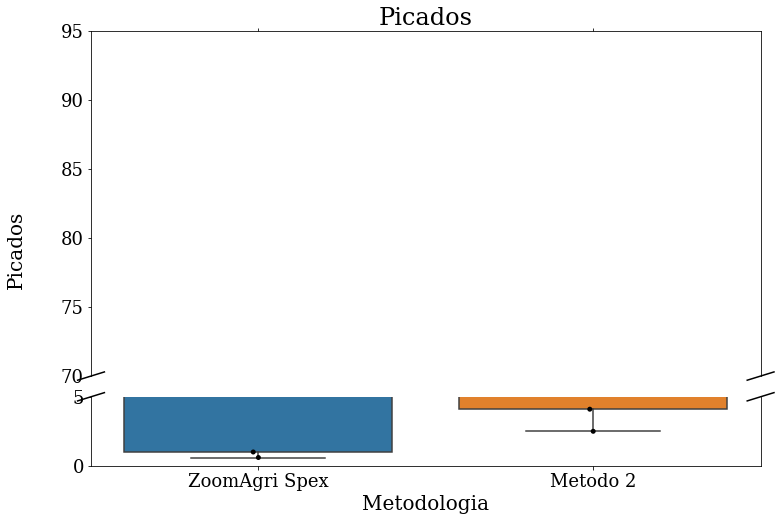

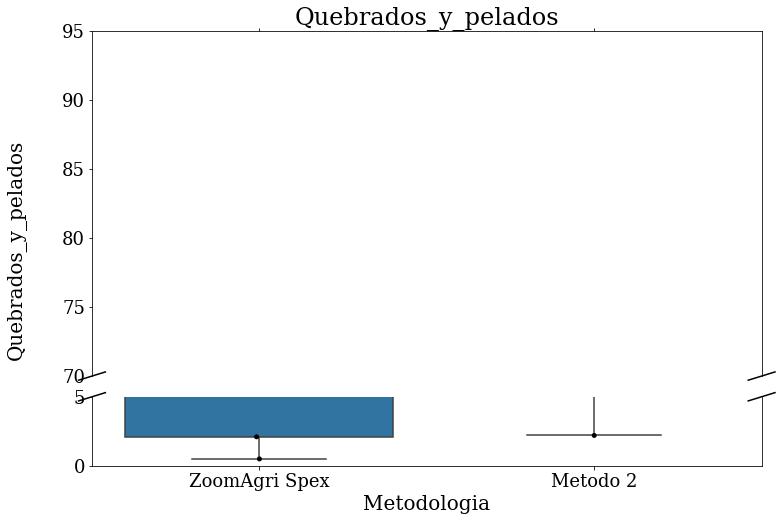

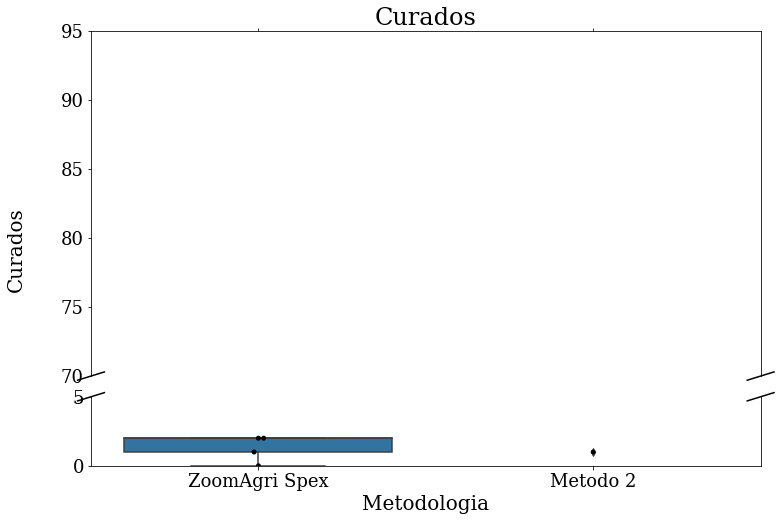

In [ ]:
#Distribucion de los datos
if Commodity in broken_plot:
    eg.box_plot_broken(lims=[[70,95],[0, 5]], data=df_1, x='Metodologia', 
                    cat=cat_norma, save=True, 
                    folder=f'{fold}/{data_to_pull}/box_plot_data')
else:
    eg.boxplot(ldata=df_1, x='Metodologia', lims=None,
                   cat=cat_norma, save=True, 
                   folder=f'{fold}/{data_to_pull}/box_plot_data')

### Exploratory data analysis

In [ ]:
#General analisis of all samples
eda_general = eda.eda(df=df_1, dv=['Metodologia'], di=cat_norma, 
                      param=['mean', 'std', 'count'], save=True, 
                      folder=f'{fold}/{data_to_pull}', 
                      title=f'eda_{data_to_pull}')
eda_general

Metodologia             Category Metric  Metodo 2  ZoomAgri Spex
3                   Bajo_zaranda  count     5.000          5.000
4                   Bajo_zaranda   mean     9.060          8.160
5                   Bajo_zaranda    std     5.915          8.010
18                       Curados  count     5.000          5.000
19                       Curados   mean    11.800          3.200
20                       Curados    std     7.259          4.438
9                        Dañados  count     5.000          5.000
10                       Dañados   mean    10.900          9.800
11                       Dañados    std     8.783         11.339
6              Materias_extrañas  count     5.000          5.000
7              Materias_extrañas   mean    13.600          8.000
8              Materias_extrañas    std     8.575          4.863
12                       Picados  count     5.000          5.000
13                       Picados   mean    10.740          8.360
14                       Picados    std     9.503          7.248
15           Quebrados_y_pelados  count     5.000          5.000
16           Quebrados_y_pelados   mean    17.000          7.460
17           Quebrados_y_pelados    std     9.286          6.800
0                  Sobre_zaranda  count     5.000          5.000
1                  Sobre_zaranda   mean    74.000         83.600
2                  Sobre_zaranda    std     3.082          7.369

In [ ]:
#Diff absolute values.
diff_abs = eda.eda_diff(df=df_1, clasif='Metodologia', sub_index='Sample', 
                        abs=True,
                        save=True, folder=f'{fold}/{data_to_pull}', 
                        title=f'diff_abs_{data_to_pull}') 
diff_abs_eda = eda.eda(df=diff_abs, dv=['Diff'], di=cat_norma, 
                   param=['mean', 'std', 'count'], save=True, 
                   folder=f'{fold}/{data_to_pull}', 
                   title=f'eda_diff_abs_{data_to_pull}')
diff_abs_eda

Diff             Category Metric  ZoomAgri Spex_vs_Metodo 2
3            Bajo_zaranda  count                      5.000
4            Bajo_zaranda   mean                      9.660
5            Bajo_zaranda    std                      5.304
18                Curados  count                      5.000
19                Curados   mean                      9.000
20                Curados    std                      7.583
9                 Dañados  count                      5.000
10                Dañados   mean                     14.020
11                Dañados    std                      9.059
6       Materias_extrañas  count                      5.000
7       Materias_extrañas   mean                     10.320
8       Materias_extrañas    std                      5.349
12                Picados  count                      5.000
13                Picados   mean                      9.980
14                Picados    std                      9.238
15    Quebrados_y_pelados  count                      5.000
16    Quebrados_y_pelados   mean                     10.860
17    Quebrados_y_pelados    std                      7.220
0           Sobre_zaranda  count                      5.000
1           Sobre_zaranda   mean                     10.400
2           Sobre_zaranda    std                      5.771

In [ ]:
#Diff relative values.
diff = eda.eda_diff(df=df_1, clasif='Metodologia', sub_index='Sample', 
                    abs=False,
                    save=True, folder=f'{fold}/{data_to_pull}', 
                    title=f'diff_abs_{data_to_pull}') 
diff_eda = eda.eda(df=diff, dv=['Diff'], di=cat_norma, 
                   param=['mean', 'std', 'count'], save=True, 
                   folder=f'{fold}/{data_to_pull}', 
                   title=f'eda_diff_{data_to_pull}')
diff_eda

Diff             Category Metric  ZoomAgri Spex_vs_Metodo 2
3            Bajo_zaranda  count                      5.000
4            Bajo_zaranda   mean                     -0.900
5            Bajo_zaranda    std                     11.990
18                Curados  count                      5.000
19                Curados   mean                     -8.600
20                Curados    std                      8.142
9                 Dañados  count                      5.000
10                Dañados   mean                     -1.100
11                Dañados    std                     18.062
6       Materias_extrañas  count                      5.000
7       Materias_extrañas   mean                     -5.600
8       Materias_extrañas    std                     11.070
12                Picados  count                      5.000
13                Picados   mean                     -2.380
14                Picados    std                     14.239
15    Quebrados_y_pelados  count                      5.000
16    Quebrados_y_pelados   mean                     -9.540
17    Quebrados_y_pelados    std                      9.262
0           Sobre_zaranda  count                      5.000
1           Sobre_zaranda   mean                      9.600
2           Sobre_zaranda    std                      7.301

### EDA graphical representation.

In [ ]:
eg.bar_plot(ci=IC, data=diff_abs, x='Sample', cat=cat_norma, 
            save=True, folder=f'{fold}/{data_to_pull}/bar_plot')

In [ ]:
eg.boxplot(data=diff, x='Diff', cat=cat_norma,
           save=True, fodler=f'{fold}/{data_to_pull}/box_plot_diff')

### Data Analysis

### Analisis. Anova

=======Exactitud - Sobre_zaranda======== 
 

========= Anovas table results ========= 

                  df      sum_sq    mean_sq         F   P-value
C(Metodologia)   2.0  153.408538  76.704269  7.332704  0.001856
Residual        42.0  439.343960  10.460570       NaN       NaN 
 

======= Tukey HSD table results ======== 

=============== Effect:Metodologia =============== 

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
Boortmalt_Arg            MR   -2.144  0.177 -5.0131  0.7251  False
Boortmalt_Arg ZoomAgri Spex  -4.5207 0.0012 -7.3898 -1.6516   True
           MR ZoomAgri Spex  -2.3767 0.1218 -5.2458  0.4924  False
------------------------------------------------------------------ 
 

======= Normality table results ======== 

========== Effect:Metodologia ========== 

                      W      pval  normal
MR             0.93

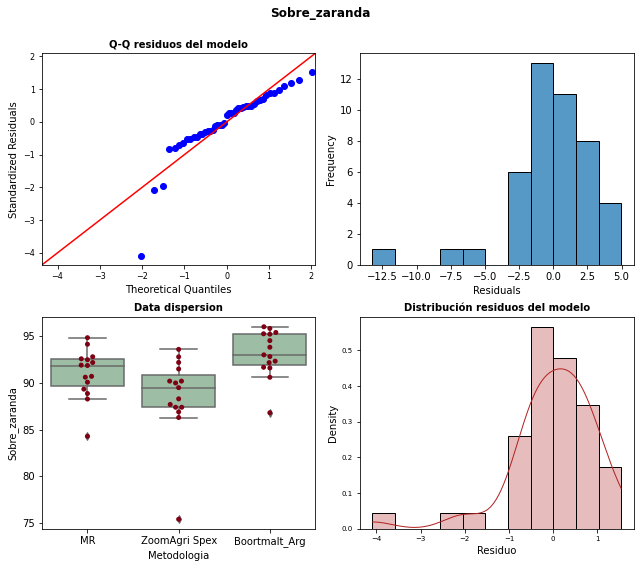


 
 
 

========Exactitud - Bajo_zaranda======== 
 

========= Anovas table results ========= 

                  df     sum_sq   mean_sq       F   P-value
C(Metodologia)   2.0   6.188538  3.094269  3.8405  0.029393
Residual        42.0  33.839160  0.805694     NaN       NaN 
 

======= Tukey HSD table results ======== 

=============== Effect:Metodologia =============== 

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
Boortmalt_Arg            MR   0.0793    0.9 -0.7169 0.8756  False
Boortmalt_Arg ZoomAgri Spex   0.8233 0.0413  0.0271 1.6196   True
           MR ZoomAgri Spex    0.744 0.0713 -0.0523 1.5403  False
----------------------------------------------------------------- 
 

======= Normality table results ======== 

========== Effect:Metodologia ========== 

                      W      pval  normal
MR             0.866732  0.030

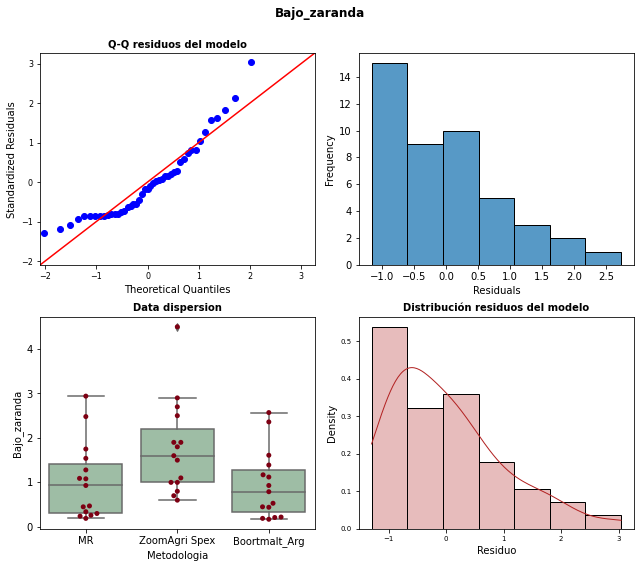


 
 
 

=====Exactitud - Materias_extrañas====== 
 

========= Anovas table results ========= 

                  df   sum_sq   mean_sq         F   P-value
C(Metodologia)   2.0  0.04492  0.022460  0.890429  0.418086
Residual        42.0  1.05940  0.025224       NaN       NaN 
 

======= Tukey HSD table results ======== 

=============== Effect:Metodologia =============== 

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
Boortmalt_Arg            MR   -0.002    0.9 -0.1429 0.1389  False
Boortmalt_Arg ZoomAgri Spex    0.066 0.4978 -0.0749 0.2069  False
           MR ZoomAgri Spex    0.068 0.4776 -0.0729 0.2089  False
----------------------------------------------------------------- 
 

======= Normality table results ======== 

========== Effect:Metodologia ========== 

                      W      pval  normal
MR             0.870891  0.034

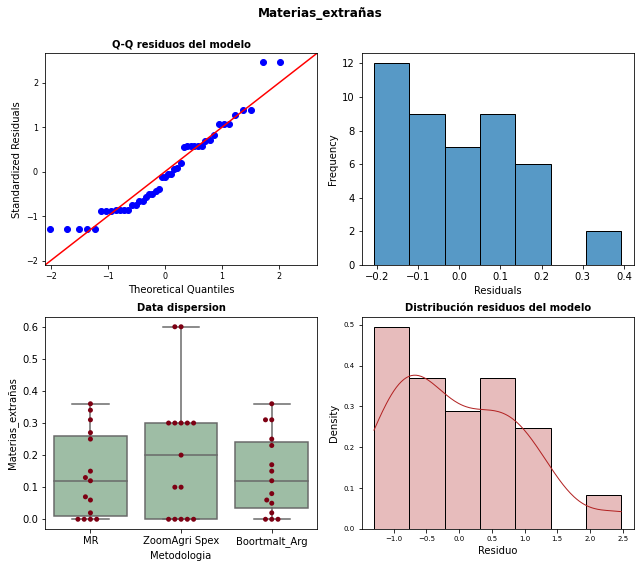


 
 
 

==========Exactitud - Dañados=========== 
 

========= Anovas table results ========= 

                  df   sum_sq   mean_sq         F   P-value
C(Metodologia)   2.0  0.07828  0.039140  0.591256  0.558174
Residual        42.0  2.78032  0.066198       NaN       NaN 
 

======= Tukey HSD table results ======== 

=============== Effect:Metodologia =============== 

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
Boortmalt_Arg            MR   -0.098 0.5519 -0.3262 0.1302  False
Boortmalt_Arg ZoomAgri Spex   -0.074 0.6974 -0.3022 0.1542  False
           MR ZoomAgri Spex    0.024    0.9 -0.2042 0.2522  False
----------------------------------------------------------------- 
 

======= Normality table results ======== 

========== Effect:Metodologia ========== 

                      W      pval  normal
MR             0.957494  0.648

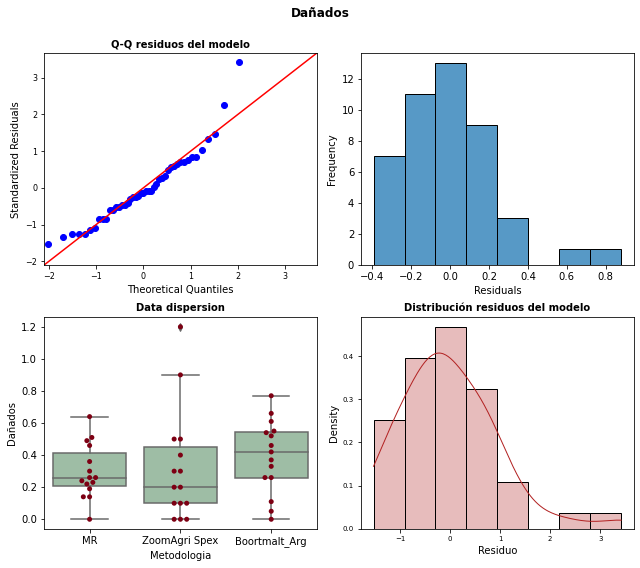


 
 
 

==========Exactitud - Picados=========== 
 

========= Anovas table results ========= 

                  df  sum_sq  mean_sq   F  P-value
C(Metodologia)   2.0     0.0      0.0 NaN      NaN
Residual        42.0     0.0      0.0 NaN      NaN 
 


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
======= Tukey HSD table results ======== 

=============== Effect:Metodologia =============== 

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
    group1        group2    meandiff p-adj  lower upper reject
--------------------------------------------------------------
Boortmalt_Arg            MR      0.0 0.5566   0.0   0.0  False
Boortmalt_Arg ZoomAgri Spex      0.0 0.5566   0.0   0.0  False
           MR ZoomAgri Spex      0.0 0.5566   0.0   0.0  False
-------------------------------------------------------------- 
 

======= Normality table results ======== 

========== Effect:Metodologia ========== 

                 W  

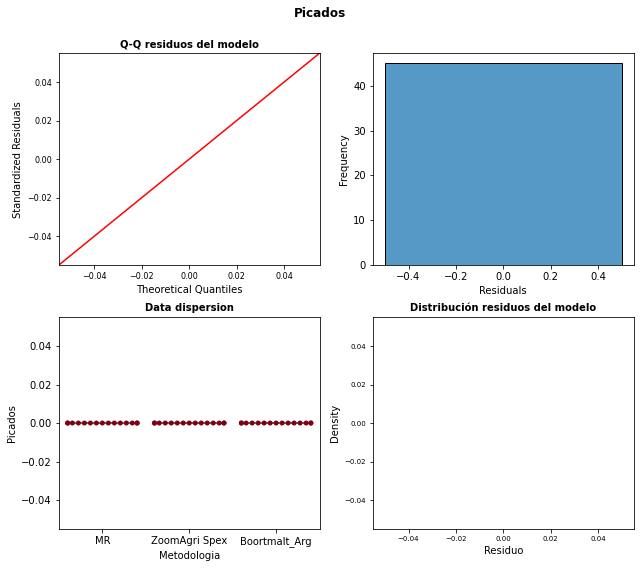


 
 
 

====Exactitud - Quebrados_y_pelados===== 
 

========= Anovas table results ========= 

                  df     sum_sq    mean_sq         F   P-value
C(Metodologia)   2.0  22.391693  11.195847  4.751326  0.013798
Residual        42.0  98.967227   2.356363       NaN       NaN 
 

======= Tukey HSD table results ======== 

=============== Effect:Metodologia =============== 

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
Boortmalt_Arg            MR   0.9193 0.2405 -0.4424 2.2811  False
Boortmalt_Arg ZoomAgri Spex   1.7267   0.01  0.3649 3.0884   True
           MR ZoomAgri Spex   0.8073 0.3304 -0.5544 2.1691  False
----------------------------------------------------------------- 
 

======= Normality table results ======== 

========== Effect:Metodologia ========== 

                      W      pval  normal
MR             0.6378

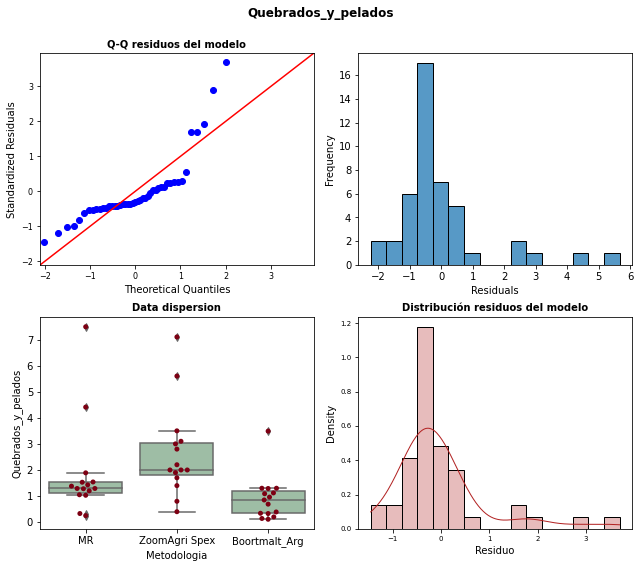


 
 
 

==========Exactitud - Curados=========== 
 

========= Anovas table results ========= 

                  df  sum_sq  mean_sq   F  P-value
C(Metodologia)   2.0     0.0      0.0 NaN      NaN
Residual        42.0     0.0      0.0 NaN      NaN 
 


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
======= Tukey HSD table results ======== 

=============== Effect:Metodologia =============== 

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
    group1        group2    meandiff p-adj  lower upper reject
--------------------------------------------------------------
Boortmalt_Arg            MR      0.0 0.5566   0.0   0.0  False
Boortmalt_Arg ZoomAgri Spex      0.0 0.5566   0.0   0.0  False
           MR ZoomAgri Spex      0.0 0.5566   0.0   0.0  False
-------------------------------------------------------------- 
 

======= Normality table results ======== 

========== Effect:Metodologia ========== 

                 W  

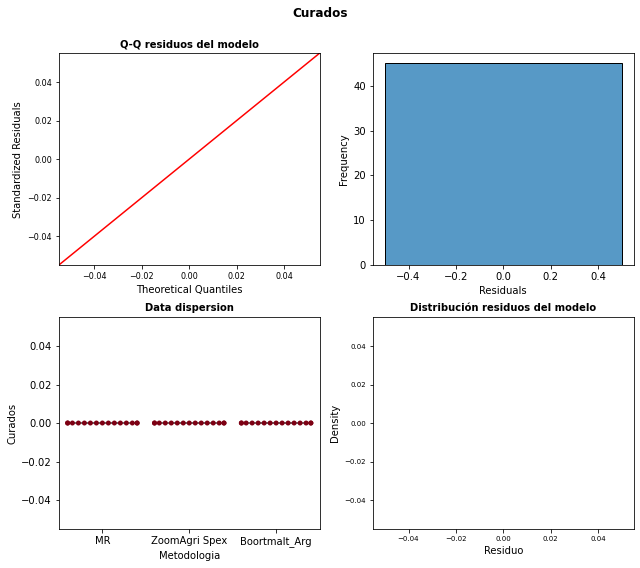

Category        Variable   df      sum_sq    mean_sq   P-value  \
0        Sobre_zaranda  C(Metodologia)  2.0  153.408538  76.704269  0.001856   
0         Bajo_zaranda  C(Metodologia)  2.0    6.188538   3.094269  0.029393   
0    Materias_extrañas  C(Metodologia)  2.0     0.04492    0.02246  0.418086   
0              Dañados  C(Metodologia)  2.0     0.07828    0.03914  0.558174   
0  Quebrados_y_pelados  C(Metodologia)  2.0   22.391693  11.195847  0.013798   

  Statistical differences  
0             Significant  
0             Significant  
0         Not Significant  
0         Not Significant  
0             Significant

In [10]:
anova.anova_report(df=df_1, 
                   di= ['Metodologia', 'Sample'], 
                   formula='C(Metodologia)+Sample', 
                   name=data_to_pull, 
                   Interaccion=False, alpha=alfa,  
                   file=f'anova_report_{data_to_pull}.doc', 
                   norma=cat_norma, 
                   folder=fold, ols_r=True)

### Analisis. Norms

Requires having at least one methodology that is used as a reference value

In [ ]:
df_lim = norm_clasification(data=df, cat=cat_norma)
df_lim.head()

Metodologia  Rep      Categoria  Result         Decision
0  ZoomAgri Spex    1  Sobre_zaranda    72.0       Tolerancia
1  ZoomAgri Spex    1  Sobre_zaranda    73.0       Tolerancia
2  ZoomAgri Spex    2  Sobre_zaranda    76.0       Tolerancia
3  ZoomAgri Spex    2  Sobre_zaranda    74.0       Tolerancia
4  ZoomAgri Spex    3  Sobre_zaranda    84.0  Base_Tolerancia

In [ ]:
df_lim2 = norm_desicion(data=df_lim, rv='MR', classifier='Metodologia', 
                        merger=['Sample', 'Categoria'])
df_lim2

KeyError: 'Sample'

In [ ]:
decision = decision_analysis(data=df_lim2, group_total=['Metodologia', 'Categoria'],
                             group_parcial=['Decision_MR', 'Accuracy'], 
                             counter=['Result'])
decision.head()

Categoria      Decision_MR Metodologia Accuracy  Result_parcial  \
0  Bajo_zaranda  Base_Tolerancia    Metodo 2     Diff               1   
1  Bajo_zaranda       Tolerancia    Metodo 2     Diff               1   
2  Bajo_zaranda       Tolerancia    Metodo 2       OK               3   
3       Curados       Tolerancia    Metodo 2       OK               5   
4       Dañados       Tolerancia    Metodo 2       OK               5   

   Result_total   porc  
0             5   20.0  
1             5   20.0  
2             5   60.0  
3             5  100.0  
4             5  100.0

In [ ]:
range_class = range_generator(data=df_lim2, rv='Result_MR', diff='Diff')


Metodologia  Sample      Categoria  Result         Decision  Result_MR  \
0  ZoomAgri Spex       1  Sobre_zaranda    71.0       Tolerancia       80.0   
1  ZoomAgri Spex       2  Sobre_zaranda    87.0             Base       82.0   
2  ZoomAgri Spex       3  Sobre_zaranda    80.0       Tolerancia       70.0   
3  ZoomAgri Spex       4  Sobre_zaranda    81.0  Base_Tolerancia       74.0   
4  ZoomAgri Spex       5  Sobre_zaranda    80.0       Tolerancia       90.0   

       Decision_MR Accuracy  Diff  Porc_diff         Rank  
0       Tolerancia       OK   9.0      11.25  10.0 - 20.0  
1  Base_Tolerancia     Diff   5.0       6.10   0.0 - 10.0  
2       Tolerancia       OK  10.0      14.29  10.0 - 20.0  
3       Tolerancia     Diff   7.0       9.46   0.0 - 10.0  
4             Base     Diff  10.0      11.11  10.0 - 20.0

In [ ]:
range_2 = range_analysis(data=range_class, group_total=['Metodologia', 'Categoria', 'Decision_MR'],
                         group_parcial=['Rank', 'Accuracy'], counter=['Result'], 
                         mean_values=['Result', 'Result_MR', 'Diff', 'Porc_diff'])
range_2


Categoria      Decision_MR    Metodologia         Rank Accuracy  \
0          Bajo_zaranda  Base_Tolerancia       Metodo 2        >=100     Diff   
1          Bajo_zaranda       Tolerancia       Metodo 2  40.0 - 50.0       OK   
2          Bajo_zaranda       Tolerancia       Metodo 2  60.0 - 70.0       OK   
3          Bajo_zaranda       Tolerancia       Metodo 2  80.0 - 90.0     Diff   
4               Curados       Tolerancia       Metodo 2  30.0 - 40.0       OK   
5               Curados       Tolerancia       Metodo 2  40.0 - 50.0       OK   
6               Curados       Tolerancia       Metodo 2  50.0 - 60.0       OK   
7               Curados       Tolerancia       Metodo 2        >=100       OK   
8               Dañados       Tolerancia       Metodo 2  20.0 - 30.0       OK   
9               Dañados       Tolerancia       Metodo 2  50.0 - 60.0       OK   
10              Dañados       Tolerancia       Metodo 2  80.0 - 90.0       OK   
11              Dañados       Tolerancia       Metodo 2        >=100       OK   
12    Materias_extrañas       Tolerancia       Metodo 2  20.0 - 30.0       OK   
13    Materias_extrañas       Tolerancia       Metodo 2        >=100       OK   
14              Picados       Tolerancia       Metodo 2  10.0 - 20.0       OK   
15              Picados       Tolerancia       Metodo 2  60.0 - 70.0       OK   
16              Picados       Tolerancia       Metodo 2        >=100       OK   
17  Quebrados_y_pelados  Base_Tolerancia       Metodo 2        >=100     Diff   
18  Quebrados_y_pelados       Tolerancia       Metodo 2  10.0 - 20.0       OK   
19  Quebrados_y_pelados       Tolerancia       Metodo 2  80.0 - 90.0     Diff   
20  Quebrados_y_pelados       Tolerancia       Metodo 2        >=100     Diff   
21        Sobre_zaranda             Base       Metodo 2   0.0 - 10.0       OK   
22        Sobre_zaranda  Base_Tolerancia       Metodo 2  10.0 - 20.0     Diff   
23        Sobre_zaranda       Tolerancia       Metodo 2   0.0 - 10.0       OK   
24        Sobre_zaranda       Tolerancia       Metodo 2  10.0 - 20.0     Diff   
25         Bajo_zaranda  Base_Tolerancia  ZoomAgri Spex        >=100     Diff   
26         Bajo_zaranda       Tolerancia  ZoomAgri Spex  10.0 - 20.0       OK   
27         Bajo_zaranda       Tolerancia  ZoomAgri Spex  30.0 - 40.0       OK   
28         Bajo_zaranda       Tolerancia  ZoomAgri Spex  70.0 - 80.0       OK   
29         Bajo_zaranda       Tolerancia  ZoomAgri Spex  80.0 - 90.0     Diff   
30              Curados       Tolerancia  ZoomAgri Spex  30.0 - 40.0       OK   
31              Curados       Tolerancia  ZoomAgri Spex  50.0 - 60.0       OK   
32              Curados       Tolerancia  ZoomAgri Spex        >=100     Diff   
33              Curados       Tolerancia  ZoomAgri Spex        >=100       OK   
34              Dañados       Tolerancia  ZoomAgri Spex  20.0 - 30.0       OK   
35              Dañados       Tolerancia  ZoomAgri Spex  30.0 - 40.0       OK   
36              Dañados       Tolerancia  ZoomAgri Spex  50.0 - 60.0       OK   
37              Dañados       Tolerancia  ZoomAgri Spex  60.0 - 70.0       OK   
38              Dañados       Tolerancia  ZoomAgri Spex        >=100       OK   
39    Materias_extrañas       Tolerancia  ZoomAgri Spex  10.0 - 20.0       OK   
40    Materias_extrañas       Tolerancia  ZoomAgri Spex  20.0 - 30.0       OK   
41    Materias_extrañas       Tolerancia  ZoomAgri Spex  80.0 - 90.0       OK   
42    Materias_extrañas       Tolerancia  ZoomAgri Spex        >=100       OK   
43              Picados       Tolerancia  ZoomAgri Spex  10.0 - 20.0       OK   
44              Picados       Tolerancia  ZoomAgri Spex  30.0 - 40.0       OK   
45              Picados       Tolerancia  ZoomAgri Spex  80.0 - 90.0     Diff   
46              Picados       Tolerancia  ZoomAgri Spex        >=100       OK   
47  Quebrados_y_pelados  Base_Tolerancia  ZoomAgri Spex        >=100     Diff   
48  Quebrados_y_pelados       Tolerancia  Zoo

# RE analysis

In [8]:
#import raw data
data_to_pull = 'Exactitud'
data = import_data(Spreadsheet_id, File_id, data_to_pull)
data = eh.standard_dataframe(data)
data

COMPLETE: Data copied
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Metodologia          15 non-null     object 
 1   Sample               15 non-null     int64  
 2   Sobre zaranda        15 non-null     int64  
 3   Bajo zaranda         15 non-null     float64
 4   Materias extrañas    15 non-null     float64
 5   Dañados              15 non-null     float64
 6   Picados              15 non-null     float64
 7   Quebrados y pelados  15 non-null     float64
 8   Curados              15 non-null     int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.2+ KB
None


Metodologia  Sample  Sobre_zaranda  Bajo_zaranda  Materias_extrañas  \
0              MR       1             83          13.1                8.5   
1              MR       2             70          11.1               29.7   
2              MR       3             90           1.2                8.0   
3              MR       4             88          10.2                1.0   
4              MR       5             70          16.2                3.5   
5   ZoomAgri Spex       1             78          18.9               20.7   
6   ZoomAgri Spex       2             71          28.7               26.1   
7   ZoomAgri Spex       3             86           1.6               10.7   
8   ZoomAgri Spex       4             75          13.6               10.4   
9   ZoomAgri Spex       5             87          12.2                3.3   
10       Metodo 2       1             73          26.9               25.9   
11       Metodo 2       2             71          28.2               25.8   
12       Metodo 2       3             88           6.5                1.7   
13       Metodo 2       4             87           0.7               11.1   
14       Metodo 2       5             88           3.5                2.3   

    Dañados  Picados  Quebrados_y_pelados  Curados  
0       7.4      5.2                 13.7       11  
1       3.5      9.0                  4.4       19  
2       3.2      9.7                  4.9        0  
3       0.3      8.4                  8.8        1  
4       1.7     28.9                 27.4       13  
5      13.1      5.2                 21.3        9  
6      10.6      8.3                  4.0       12  
7       1.9     13.6                  0.7       13  
8      24.8      2.8                  9.5       23  
9       1.1      7.8                  4.4       11  
10     26.9     18.4                  3.0        4  
11      7.9     21.0                 20.5        7  
12      7.5     11.9                 10.9        6  
13      7.9      1.3                  2.7        2  
14      1.5     10.3                  6.6       11

## Exploratory data analysis

In [32]:
#Later on. for eda 
from statsmodels.stats.descriptivestats import Description
Description(data['Sobre_zaranda']).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

## Anovas

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
df=data
di = ['Metodologia', 'Sample']
formula = 'C(Metodologia)+Sample'
name = data_to_pull
Interaccion = False
alpha= alfa
file = f'{name}.txt'
norma = cat_norma
folder = fold

=======Exactitud - Sobre_zaranda======== 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:          Sobre_zaranda   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                 -0.181
Method:                 Least Squares   F-statistic:                    0.2845
Date:                Sat, 21 May 2022   Prob (F-statistic):              0.836
Time:                        12:11:18   Log-Likelihood:                -46.861
No. Observations:                  15   AIC:                             101.7
Df Residuals:                      11   BIC:                             104.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------

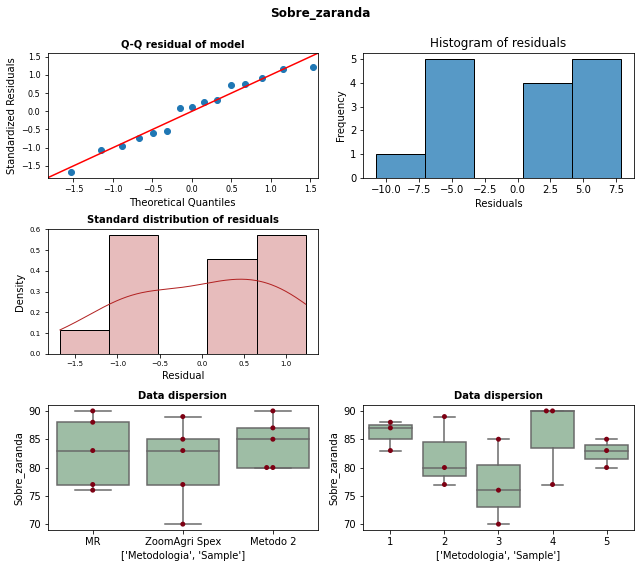

========Exactitud - Bajo_zaranda======== 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:           Bajo_zaranda   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                 -0.178
Method:                 Least Squares   F-statistic:                    0.2955
Date:                Sat, 21 May 2022   Prob (F-statistic):              0.828
Time:                        12:11:19   Log-Likelihood:                -48.357
No. Observations:                  15   AIC:                             104.7
Df Residuals:                      11   BIC:                             107.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------

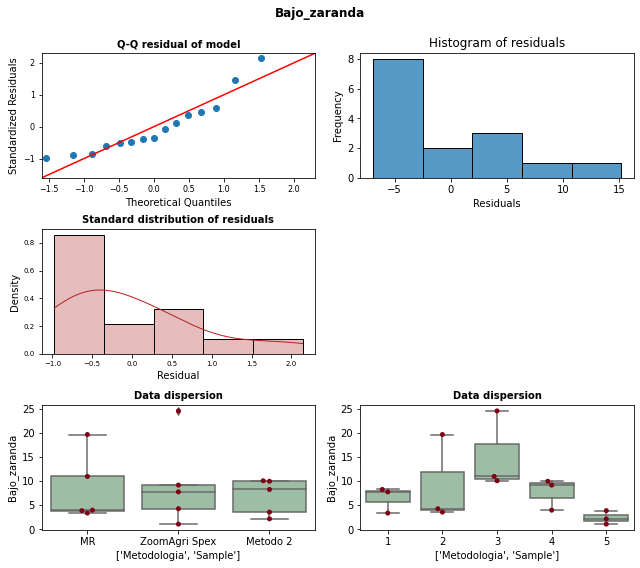

=====Exactitud - Materias_extrañas====== 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:      Materias_extrañas   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                 -0.144
Method:                 Least Squares   F-statistic:                    0.4142
Date:                Sat, 21 May 2022   Prob (F-statistic):              0.746
Time:                        12:11:20   Log-Likelihood:                -48.434
No. Observations:                  15   AIC:                             104.9
Df Residuals:                      11   BIC:                             107.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------

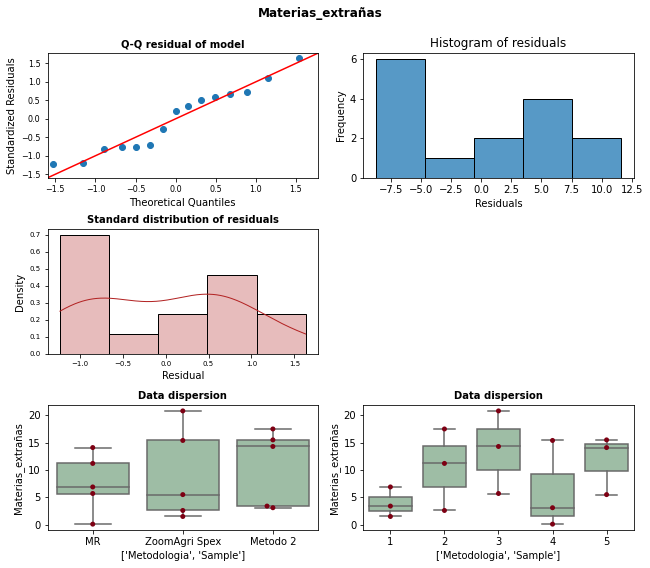

==========Exactitud - Dañados=========== 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:                Dañados   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1.551
Date:                Sat, 21 May 2022   Prob (F-statistic):              0.257
Time:                        12:11:21   Log-Likelihood:                -47.998
No. Observations:                  15   AIC:                             104.0
Df Residuals:                      11   BIC:                             106.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------

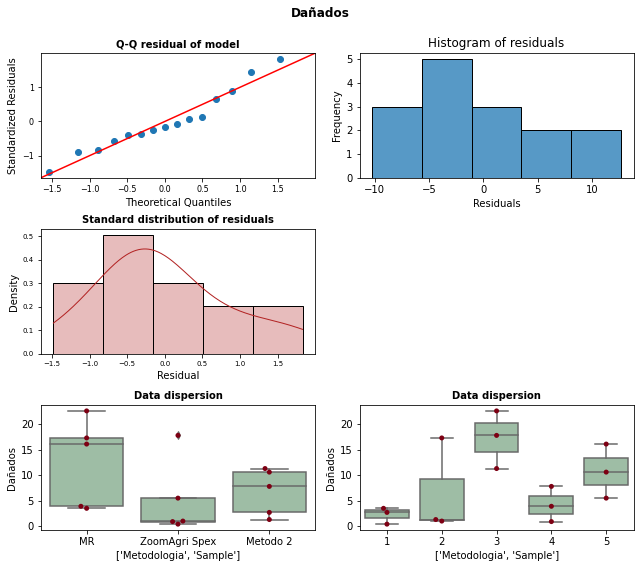

==========Exactitud - Picados=========== 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:                Picados   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                 -0.195
Method:                 Least Squares   F-statistic:                    0.2392
Date:                Sat, 21 May 2022   Prob (F-statistic):              0.867
Time:                        12:11:22   Log-Likelihood:                -45.076
No. Observations:                  15   AIC:                             98.15
Df Residuals:                      11   BIC:                             101.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------

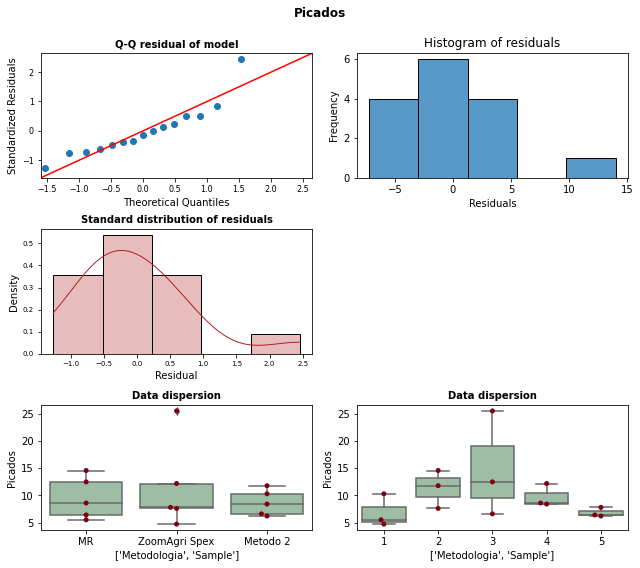

====Exactitud - Quebrados_y_pelados===== 
 

============OLS model report============
                             OLS Regression Results                            
Dep. Variable:     Quebrados_y_pelados   R-squared:                       0.044
Model:                             OLS   Adj. R-squared:                 -0.216
Method:                  Least Squares   F-statistic:                    0.1707
Date:                 Sat, 21 May 2022   Prob (F-statistic):              0.914
Time:                         12:11:23   Log-Likelihood:                -42.497
No. Observations:                   15   AIC:                             92.99
Df Residuals:                       11   BIC:                             95.83
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------

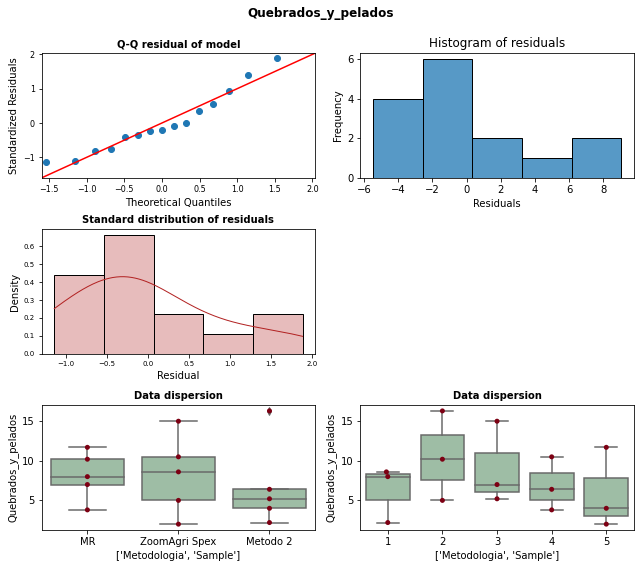

==========Exactitud - Curados=========== 
 

============OLS model report============
                            OLS Regression Results                            
Dep. Variable:                Curados   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                 -0.094
Method:                 Least Squares   F-statistic:                    0.5997
Date:                Sat, 21 May 2022   Prob (F-statistic):              0.628
Time:                        12:11:24   Log-Likelihood:                -46.590
No. Observations:                  15   AIC:                             101.2
Df Residuals:                      11   BIC:                             104.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------

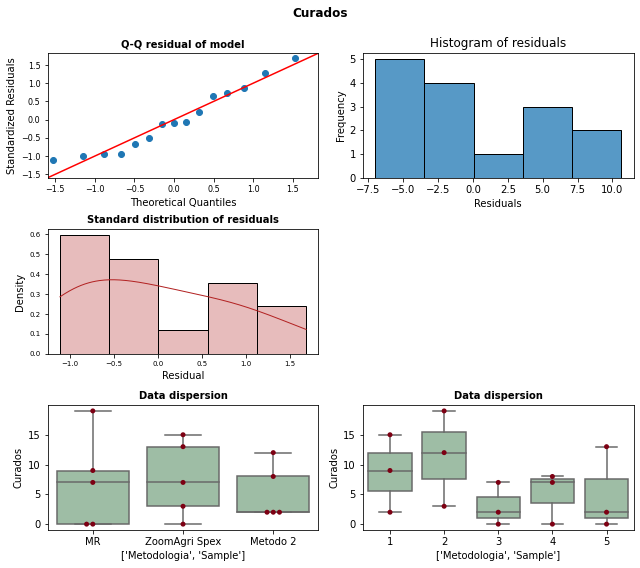

Category        Variable   df   sum_sq mean_sq P-value  \
0        Sobre_zaranda  C(Metodologia)  2.0   32.533  16.267   0.683   
1        Sobre_zaranda          Sample  1.0      2.7     2.7   0.803   
0         Bajo_zaranda  C(Metodologia)  2.0   16.645   8.323    0.85   
1         Bajo_zaranda          Sample  1.0   28.033  28.033   0.471   
0    Materias_extrañas  C(Metodologia)  2.0   24.965  12.483   0.787   
1    Materias_extrañas          Sample  1.0   38.307  38.307   0.404   
0              Dañados  C(Metodologia)  2.0  158.436  79.218   0.236   
1              Dañados          Sample  1.0   65.121  65.121   0.269   
0              Picados  C(Metodologia)  2.0   22.516  11.258   0.715   
1              Picados          Sample  1.0    0.833   0.833   0.876   
0  Quebrados_y_pelados  C(Metodologia)  2.0    6.181   3.091   0.876   
1  Quebrados_y_pelados          Sample  1.0    5.633   5.633   0.631   
0              Curados  C(Metodologia)  2.0     15.6     7.8   0.825   
1              Curados          Sample  1.0   56.033  56.033    0.26   

  Statistical differences  
0         Not Significant  
1         Not Significant  
0         Not Significant  
1         Not Significant  
0         Not Significant  
1         Not Significant  
0         Not Significant  
1         Not Significant  
0         Not Significant  
1         Not Significant  
0         Not Significant  
1         Not Significant  
0         Not Significant  
1         Not Significant

In [7]:
anova.anova_report(df=df_exactitud, di= ['Metodologia', 'Sample'], 
                   formula='C(Metodologia)+Sample', name=data_to_pull, 
                   Interaccion=False, alpha=alfa,  
                   file=f'anova_report_{data_to_pull}.doc', norma=cat_norma, 
                   folder=fold, ols_r=True)

## Post hoc test

### Fisher test

In [35]:
import pandas as pd
a = eda.eda(df=data, dv=['Metodologia'], di=cat_norma, 
    param=['mean'], save=False)
a=a[a['Category']=='Dañados']
a= pd.melt(a, id_vars=['Category', 'Metric',])
a.sort_values(by='value', ascending=False, inplace=True)
a

Category Metric    Metodologia  value
1  Dañados   mean       Metodo 2  10.34
2  Dañados   mean  ZoomAgri Spex  10.30
0  Dañados   mean             MR   3.22

In [40]:
b = eda.eda(df=data, dv=['Metodologia'], di=cat_norma, 
    param=['count'], save=False)
b=b[b['Category']=='Dañados']
b= pd.melt(b, id_vars=['Category', 'Metric',])
b= b['value'].unique().tolist()[0]
b

5.0

### Fisher's LSD

In [26]:
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula1 = f'Dañados~C(Metodologia)+Sample'
model = ols(formula = formula1, data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1, robust='hc2')
anova = pd.DataFrame(sm.stats.anova_lm(model, typ=1, robust='hc2'))
anova.reset_index(inplace=True)
anova

index    df      sum_sq     mean_sq         F    PR(>F)
0  C(Metodologia)   2.0  168.037333   84.018667  1.578169  0.249706
1          Sample   1.0  188.501333  188.501333  3.540725  0.086591
2        Residual  11.0  585.618667   53.238061       NaN       NaN

In [25]:
#cuadrado medio error
MSEr = anova[anova['index']=='Residual']
MSEr = MSEr['mean_sq'].unique().tolist()[0]
MSEr

53.2380606060606

In [30]:
#grados de libertad
dfr = anova[anova['index']=='Residual']
dfr = dfr['df'].unique().tolist()[0]
dfr

11.0

In [29]:
#alpha
alpha = alfa/2

0.025

In [36]:
from scipy import stats
t_critic = stats.t.ppf(1-alpha, dfr)

In [45]:
from math import sqrt
LSD = (t_critic*sqrt((MSEr*(2/b)))).round(3)
LSD

10.157